In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
import pcmdpy as ppy
import pandas as pd
from seaborn import color_palette
from tqdm import tqdm
%matplotlib inline

In [2]:
import easydarkfigs

In [3]:
%set_lightfigdir figures/
%set_darkfigdir figures_dark/

In [4]:
from dynesty import utils as dyfunc

In [5]:
from scipy.stats import norm

In [6]:
from setup_files.mocks_paper1.mock_models import models, run_names, results as res

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
/Users/bcook/pCMDs/pixcmd/pcmdpy/pcmdpy/results/results.py:89: RuntimeWarning: invalid value encountered in sqrt
  logzerrs.append(np.sqrt(logzvar))


In [7]:
for k, r in res.items():
    if r.max_logl is not None:
        print(k, r.max_logl)

mock_5 -1005.75
mock_6 -1021.56
mock_7 -1010.3
mock_9 -1046.22
mock_60 -7225.0


In [8]:
max_logls = pd.read_csv('setup_files/mocks_paper1/max_logls_post.csv', index_col=0)

In [9]:
for k, r in res.items():
    if k in max_logls.index.values:
        r.max_logl = max_logls.loc[k].max_logl
        if np.isnan(r.max_logl):
            r.max_logl = max_logls.loc[k].logl_mean
    elif r.max_logl is None:
        print(f'No maxLogl found for {k}')
        

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt


No maxLogl found for mock_8
No maxLogl found for mock_11


/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:657: RuntimeWarning: overflow encountered in double_scalars
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:656: RuntimeWarning: overflow encountered in double_scalars
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:663: RuntimeWarning: invalid value encountered in double_scalars
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:661: RuntimeWarning: invalid value encountered in double_scalars


No maxLogl found for mock_40
No maxLogl found for mock_43
No maxLogl found for mock_44
No maxLogl found for mock_45
No maxLogl found for mock_46
No maxLogl found for mock_47
No maxLogl found for mock_48
No maxLogl found for mock_49
No maxLogl found for mock_50
No maxLogl found for mock_51
No maxLogl found for mock_52
No maxLogl found for mock_53
No maxLogl found for mock_54
No maxLogl found for mock_55
No maxLogl found for mock_56
No maxLogl found for mock_57
No maxLogl found for mock_58
No maxLogl found for mock_59
No maxLogl found for mismatch_2
No maxLogl found for mismatch_5
No maxLogl found for mismatch_7
No maxLogl found for mismatch_8
No maxLogl found for mismatch_9


In [12]:
## Temporary Only
res['mock_55'].max_logl = res['mock_41'].max_logl
res['mock_56'].max_logl = res['mock_42'].max_logl
res['mock_57'].max_logl = res['mock_43'].max_logl
res['mock_58'].max_logl = res['mock_44'].max_logl
res['mock_59'].max_logl = res['mock_45'].max_logl

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt


In [20]:
not_finished = []
for k, r in res.items():
    dlz = r.as_dynesty()['delta_logz'][-1]
    if dlz >= 0.1:
        print(k, f'{dlz:.2e}', run_names[k])
        not_finished.append(k)

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt


mock_11 8.05e+01 Tau-MDF Model (Distance Free, Nim=1024)


/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:657: RuntimeWarning: overflow encountered in double_scalars
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:656: RuntimeWarning: overflow encountered in double_scalars
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:663: RuntimeWarning: invalid value encountered in double_scalars
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:661: RuntimeWarning: invalid value encountered in double_scalars


mock_47 3.26e+01 NonParam Model (Distance Free, Npix=1e4)
mock_48 1.73e+02 NonParam Model (Distance Free, Npix=1e5)
mock_49 5.42e+01 NonParam Model (Distance Free, Npix=1e6)
mock_51 1.10e+00 NonParam Model (Distance Free, Npix=1e3, Constant SFR)
mock_52 3.73e+01 NonParam Model (Distance Free, Npix=1e4, Constant SFR)
mock_53 1.78e+02 NonParam Model (Distance Free, Npix=1e5, Constant SFR)
mock_54 7.42e+01 NonParam Model (Distance Free, Npix=1e6, Constant SFR)
mismatch_5 3.74e+02 Model: DustFrac = 1, Truth: DustFrac = 0.5
mismatch_7 9.42e+02 Model: Overestimates Exposure Time by 5x
mismatch_8 6.21e+01 Model: Overestimates PSF width by 10%
mismatch_9 1.05e+03 Model: Overestimates F814W PSF width by 10%


In [14]:
res['mock_51'].df.tail()

niter   nc     eff    logl       logwt     logvol        logz  \
7534  7535.0  1.0  4.2714 -646.63 -667.554208 -18.671168 -667.461431   
7535  7536.0  1.0  4.2714 -646.34 -666.755130 -18.894312 -666.354031   
7536  7537.0  1.0  4.2714 -636.87 -657.843676 -19.181994 -657.843475   
7537  7538.0  1.0  4.2714 -631.61 -652.578571 -19.587459 -652.573415   
7538  7539.0  1.0  4.2714 -613.94 -634.913753 -20.280606 -634.913753   

       logzerr          h  delta_logz      ...       logSFH2  logSFH3  \
7534  0.413853  20.397629   34.850263      ...        2.3457   2.2907   
7535  0.117325  19.691765   33.519719      ...        2.1029   1.9193   
7536  0.617829  20.970773   24.721481      ...        2.1549   2.4580   
7537  0.597317  20.909301   19.045956      ...        2.1595   1.6938   
7538  0.633611  20.973752    1.098612      ...        2.0195   2.3179   

      logSFH4    dmod  live   logNpix   log_weights  dynesty_weights  \
7534   2.7177  26.064  True  2.998234 -3.264046e+01     6.674680e-15   
7535   3.0317  26.160  True  3.128082 -3.184138e+01     1.484109e-14   
7536   2.7641  26.055  True  3.035410 -2.292992e+01     1.100680e-10   
7537   3.0566  26.225  True  3.147155 -1.766482e+01     2.129448e-08   
7538   2.8856  25.985  True  3.051700 -2.140462e-08     1.000000e+00   

      likelihood_weights       weights  
7534        6.352042e-15  6.674680e-15  
7535        8.489044e-15  1.484109e-14  
7536        1.100595e-10  1.100680e-10  
7537        2.118442e-08  2.129448e-08  
7538        1.000000e+00  1.000000e+00  

[5 rows x 25 columns]

In [15]:
plt.style.use('cook')
light_color = [c['color'] for c in plt.rcParams['axes.prop_cycle']][0]
dark_color = [c['color'] for c in plt.rcParams['axes.prop_cycle']][2]

# Summary of Run Statistics

In [30]:
keys = list(res.keys())
n_iters = np.array([len(res[k].df) for k in keys])
n_call = np.array([res[k].df.nc.sum() for k in keys])
t_run = np.array([res[k].df.time_elapsed.max() for k in keys])
t_step = t_run * 3600. / np.array([res[k].df.nc.sum() for k in keys])
dlogz = [res[k].as_dynesty()['delta_logz'][-1] for k in keys]
finished = [dlz <= 0.1 for dlz in dlogz]
logl_max = [max_logls.loc[k].logl_mean if k in max_logls.index else np.inf for k in keys]

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:657: RuntimeWarning: overflow encountered in double_scalars
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:656: RuntimeWarning: overflow encountered in double_scalars
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:663: RuntimeWarning: invalid value encountered in double_scalars
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:661: RuntimeWarning: invalid value encountered in double_scalars


In [31]:
df_summary = pd.DataFrame(data={'t_run': t_run, 't_step': t_step, 'delta_logz': dlogz, 'finished': finished,
                                'logl_max': logl_max, 'n_iter': n_iters, 'n_call': n_call}, index=keys)

In [32]:
df_summary.loc[not_finished]

t_run    t_step   delta_logz  finished  logl_max  n_iter  \
mock_11     171.113889  9.046598    80.475754     False  -853.291   11329   
mock_47     103.836111  1.491731    32.560441     False  -141.773    6946   
mock_48     147.927778  2.393374   173.396147     False   -95.117    6139   
mock_49     155.250000  2.230452    54.202442     False   -64.991    5806   
mock_51     110.041667  2.403910     1.098612     False  -617.423    7539   
mock_52     102.002778  2.437019    37.300442     False  -455.663    6481   
mock_53     107.886111  2.579859   177.807442     False  -266.916    5331   
mock_54     117.947222  2.820429    74.224442     False  -124.137    5000   
mismatch_5   76.019444  1.089034   373.767147     False  -998.297   12477   
mismatch_7  118.116667  2.228254   942.053279     False -1152.831   10899   
mismatch_8  113.927778  1.635503    62.075795     False -1115.648   12195   
mismatch_9  108.650000  2.139154  1052.669137     False  -835.723   11529   

              n_call  
mock_11      68093.0  
mock_47     250588.0  
mock_48     222506.0  
mock_49     250577.0  
mock_51     164794.0  
mock_52     150680.0  
mock_53     150547.0  
mock_54     150548.0  
mismatch_5  251296.0  
mismatch_7  190831.0  
mismatch_8  250773.0  
mismatch_9  182848.0

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt


(<Figure size 864x1080 with 10 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123a97160>,
       dtype=object))

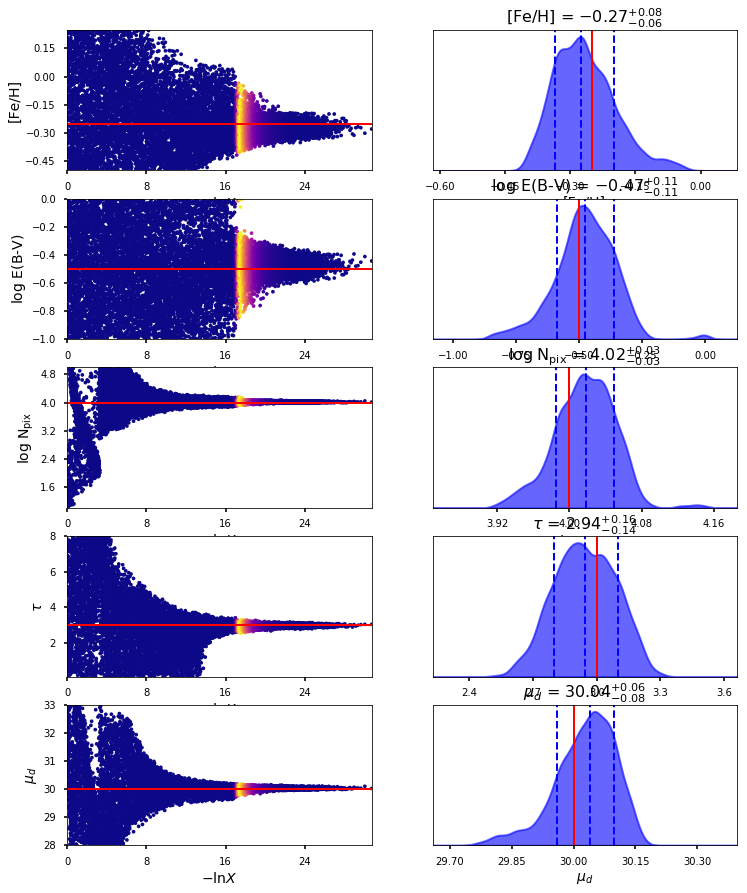

In [36]:
res['mock_57'].plot_trace();

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support None instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
Saving light figure as figures/paper1/NonParam_Corner_const.pdf
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support None instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legen

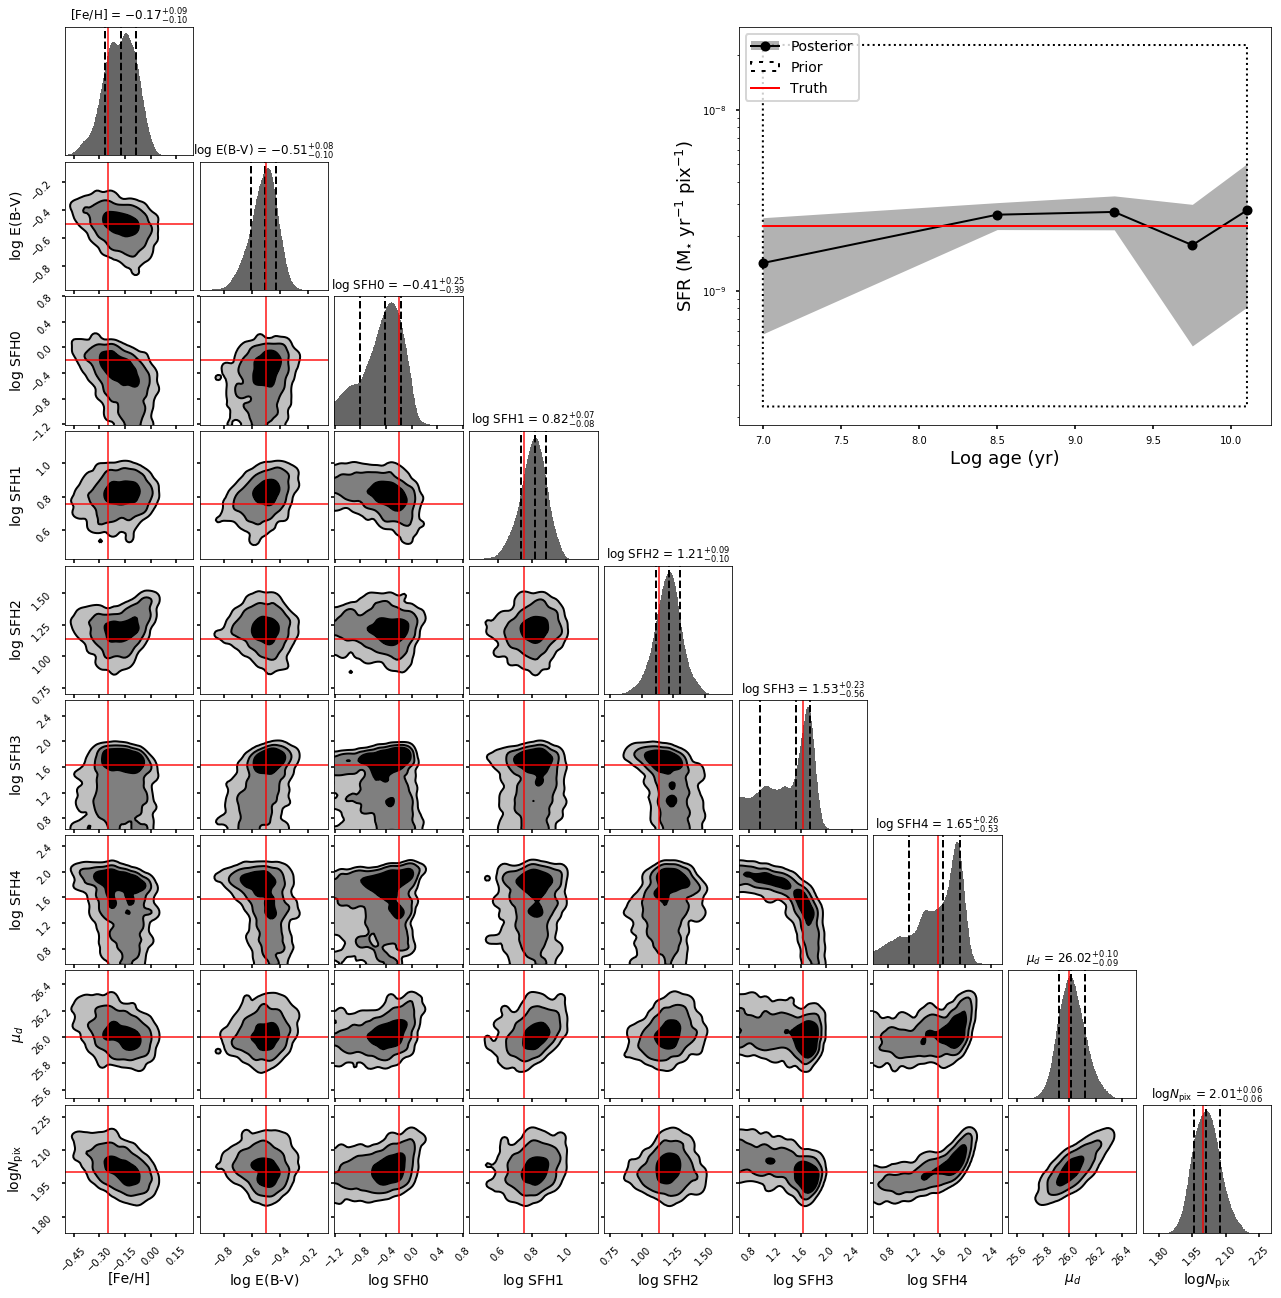

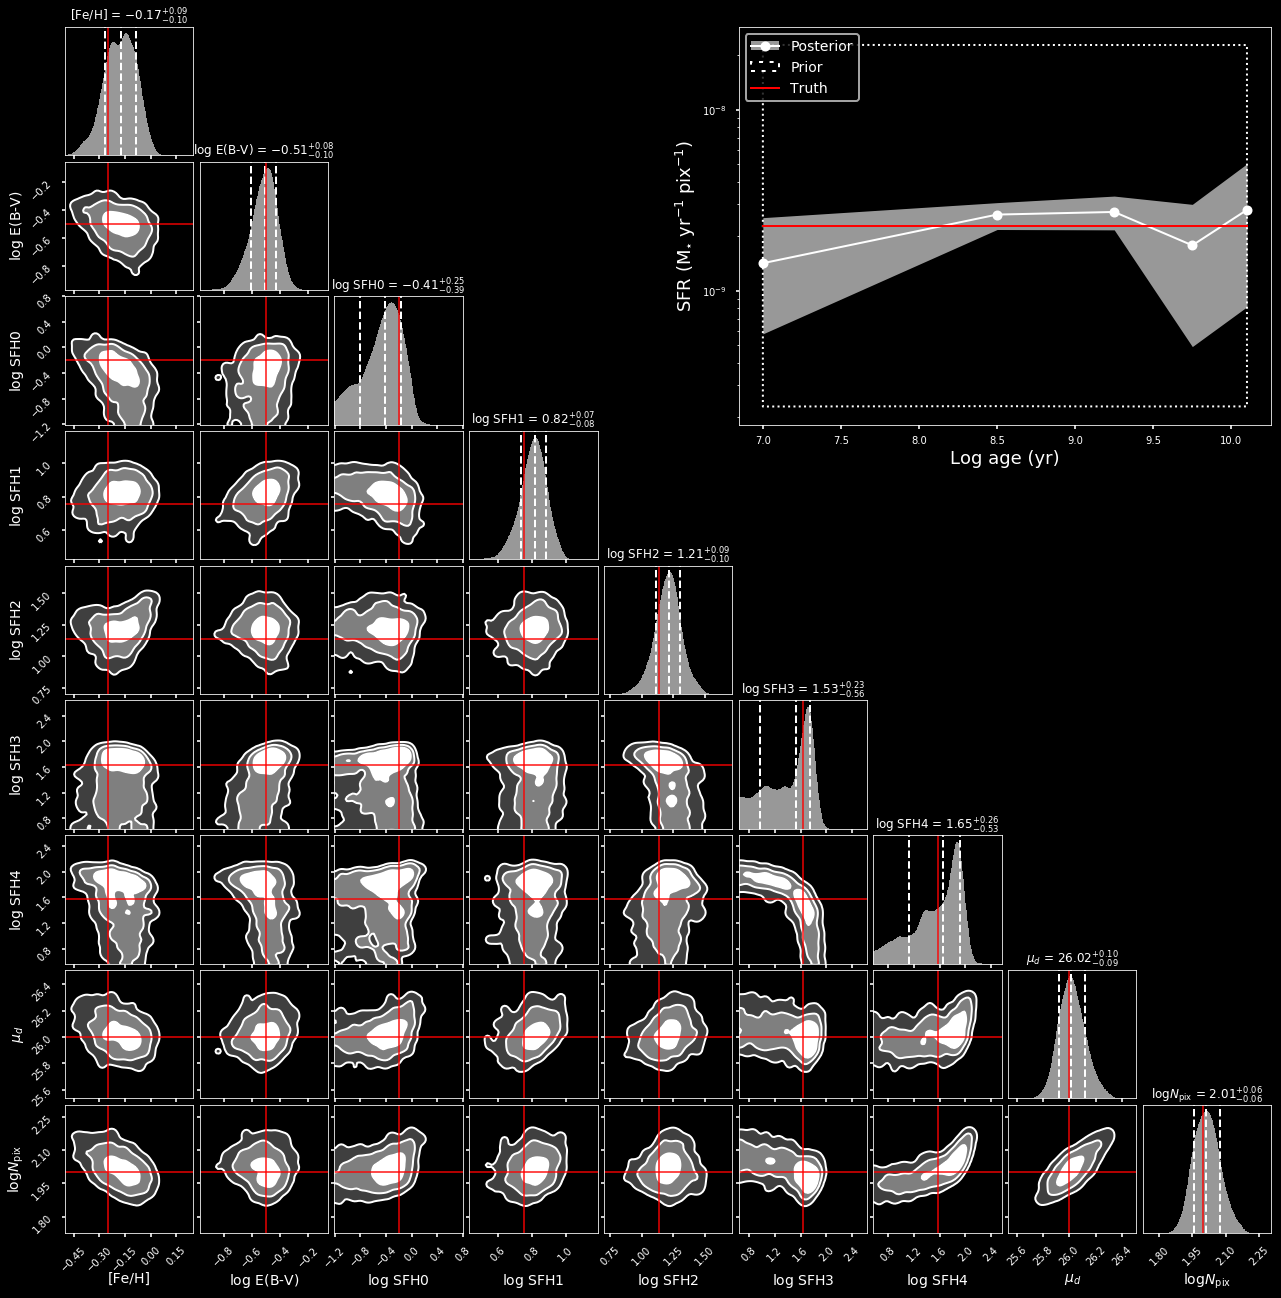

In [62]:
%%savefig_dark_light paper1/NonParam_Corner_const.pdf
r = res['mock_50']
fig, axes = plt.subplots(ncols=9, nrows=9, figsize=(18, 18))
fig, axes = r.plot_corner(fig=(fig,axes));
for ax in axes.flatten():
    ax.title.set_fontsize(12.)
gs = axes[0,0].get_gridspec()
for i in range(9):
    for j in range(9):
        if j > i:
            axes[i,j].remove()
axbig = fig.add_subplot(gs[:3, 5:])
_, lines = r.plot_sfr(ax=axbig, all_ages=False,
                      error_kwargs={'alpha': 0.})
axbig.set_ylabel(axbig.get_ylabel(), fontsize=18)
axbig.set_xlabel(axbig.get_xlabel(), fontsize=18)

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support None instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
Saving light figure as figures/paper1/NonParam_Corner_tau.pdf
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support None instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-

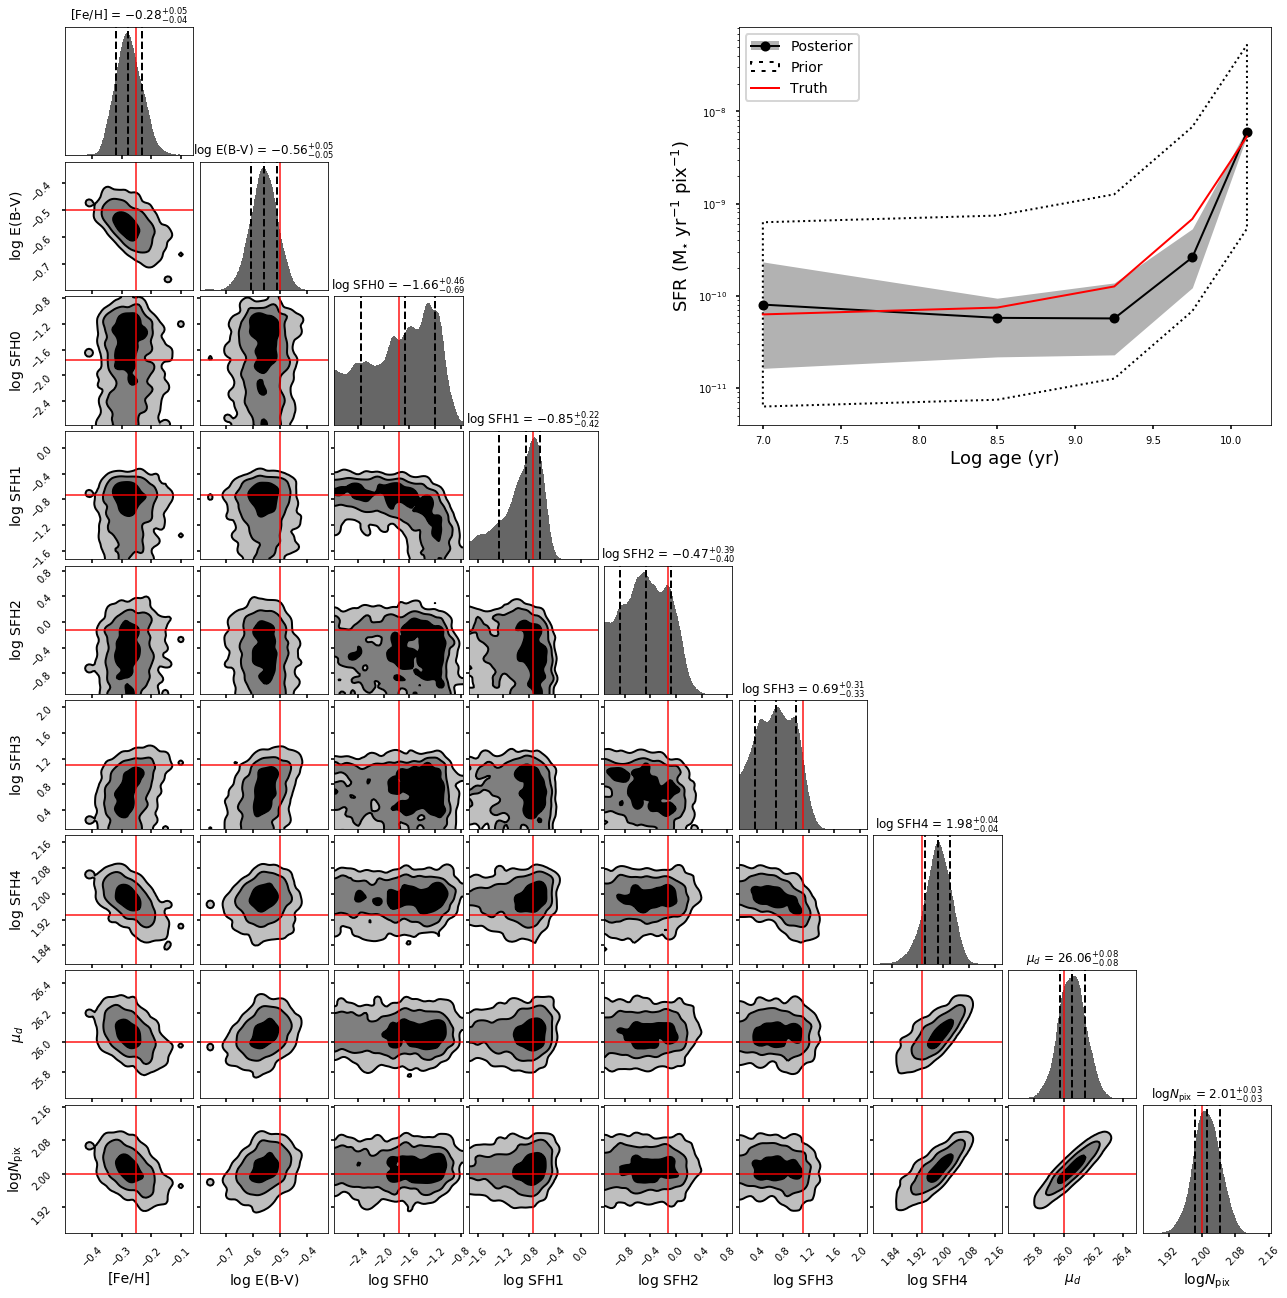

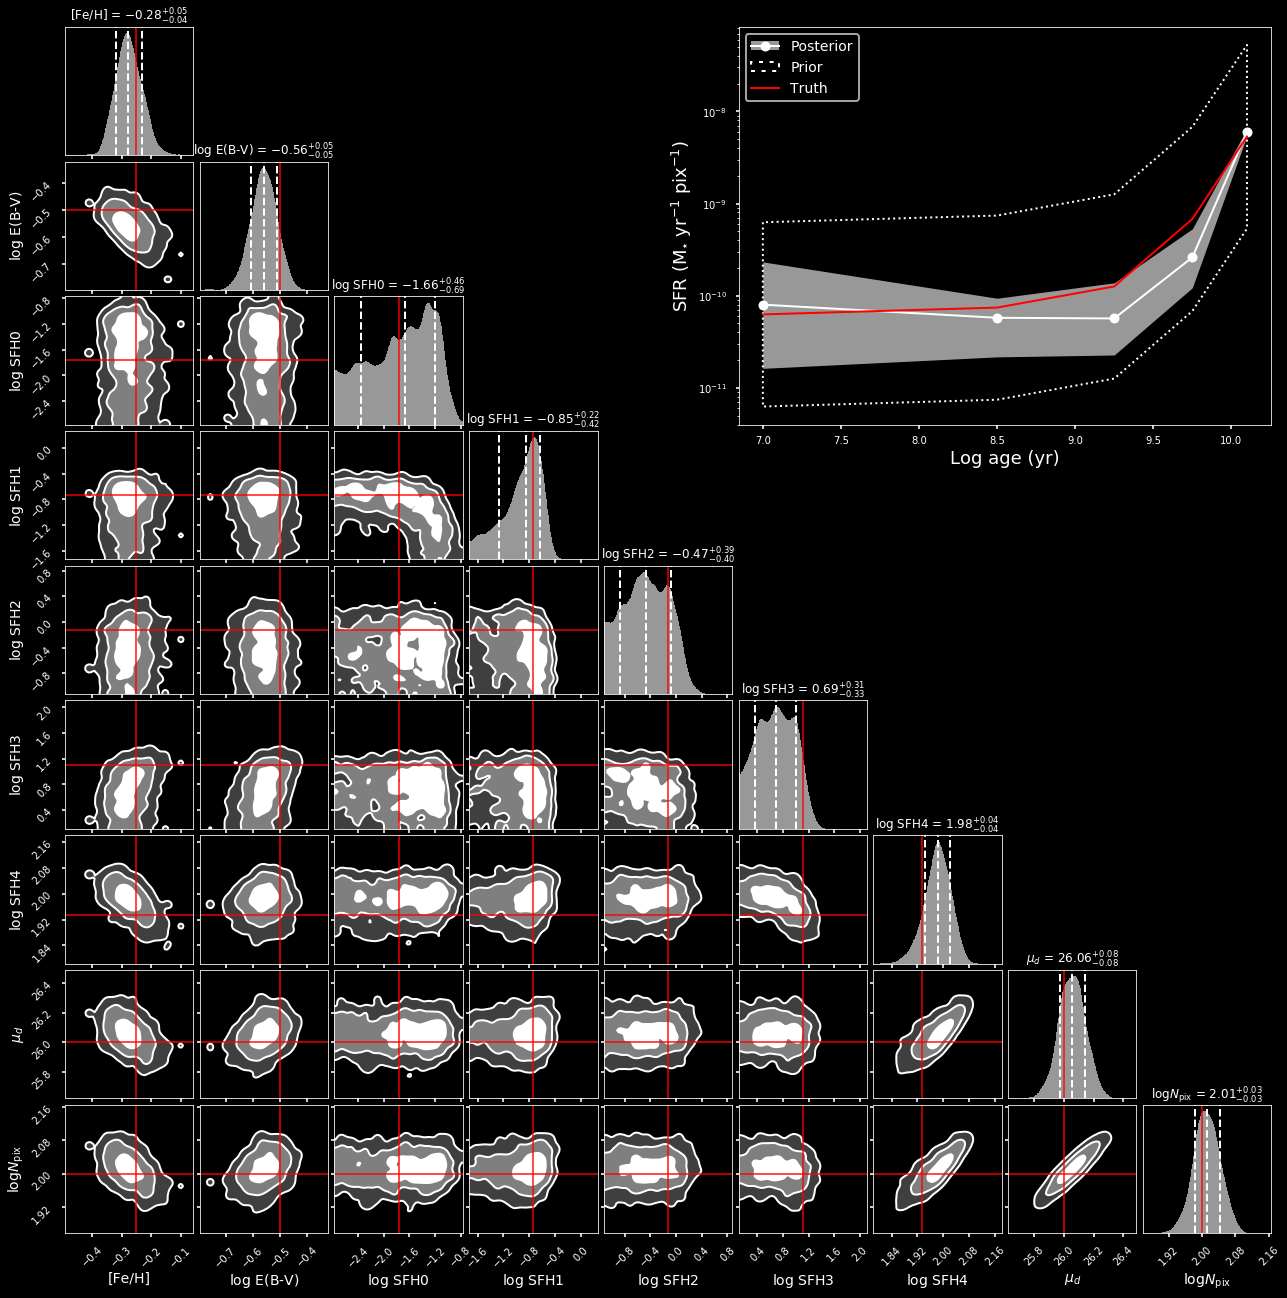

In [19]:
%%savefig_dark_light paper1/NonParam_Corner_tau.pdf
r = res['mock_8']
fig, axes = plt.subplots(ncols=9, nrows=9, figsize=(18, 18))
fig, axes = r.plot_corner(fig=(fig,axes));
for ax in axes.flatten():
    ax.title.set_fontsize(12.)
gs = axes[0,0].get_gridspec()
for i in range(9):
    for j in range(9):
        if j > i:
            axes[i,j].remove()
axbig = fig.add_subplot(gs[:3, 5:])
_, lines = r.plot_sfr(ax=axbig, all_ages=False,
                      error_kwargs={'alpha': 0.})
axbig.set_ylabel(axbig.get_ylabel(), fontsize=18)
axbig.set_xlabel(axbig.get_xlabel(), fontsize=18)

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support None instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
Saving light figure as figures/paper1/NonParam_Corner_const_3.pdf
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support None instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-leg

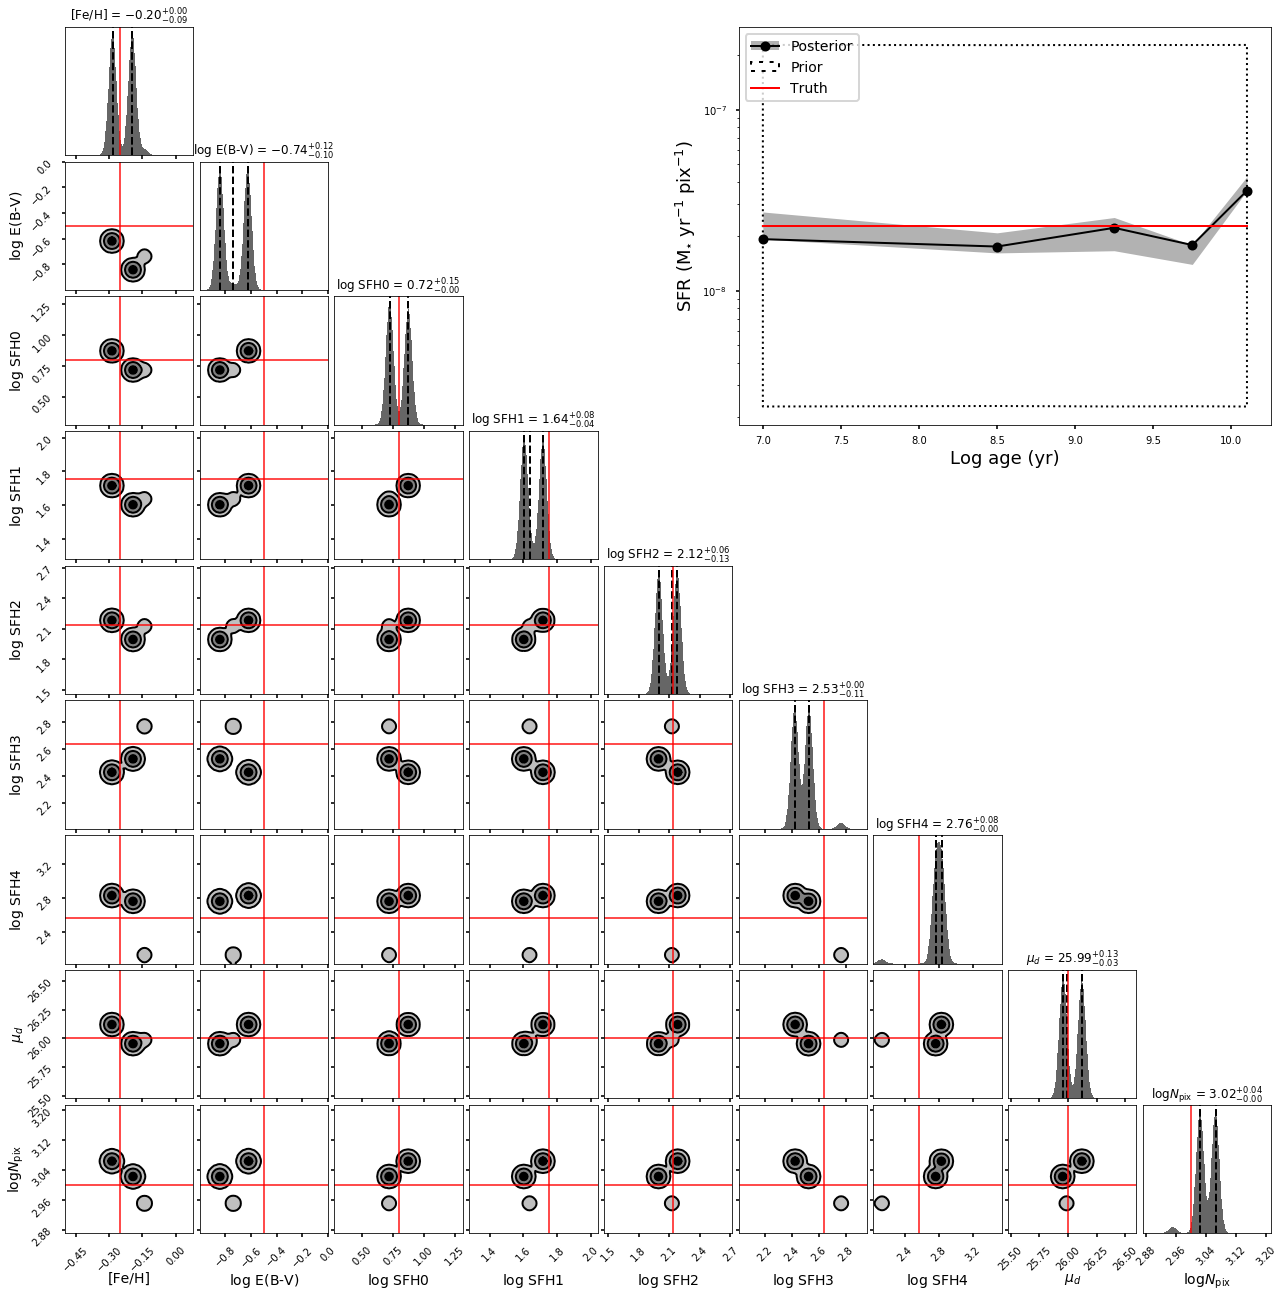

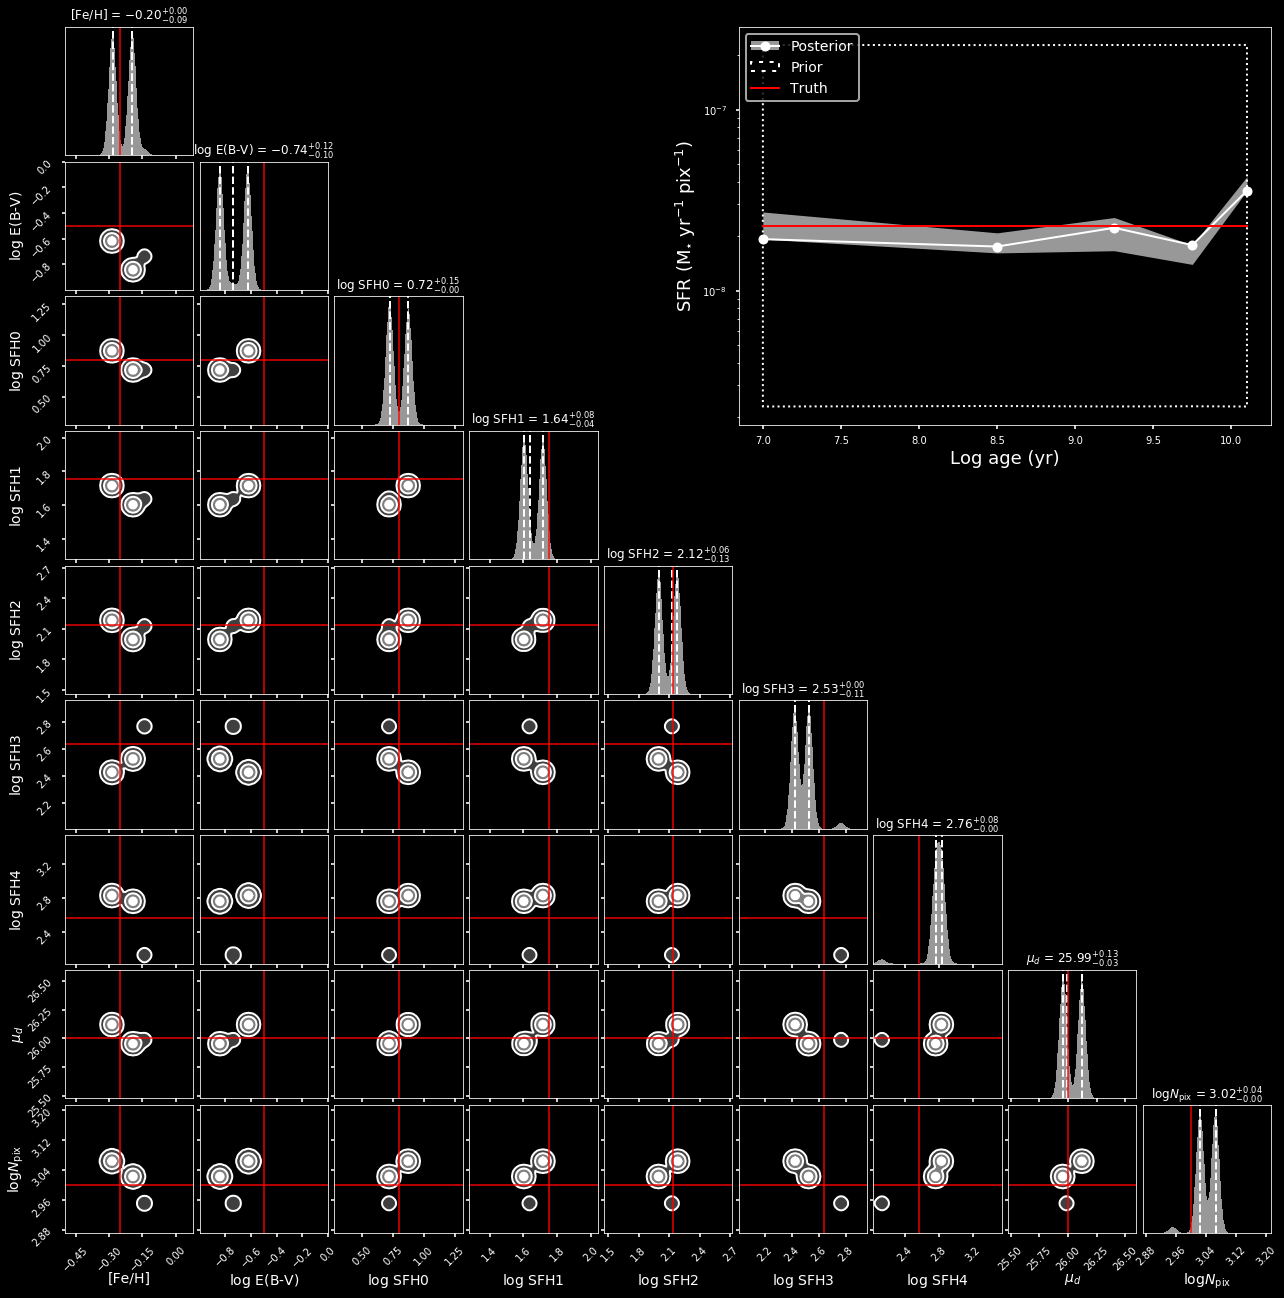

In [20]:
%%savefig_dark_light paper1/NonParam_Corner_const_3.pdf
r = res['mock_51']
fig, axes = plt.subplots(ncols=9, nrows=9, figsize=(18, 18))
fig, axes = r.plot_corner(fig=(fig,axes));
for ax in axes.flatten():
    ax.title.set_fontsize(12.)
gs = axes[0,0].get_gridspec()
for i in range(9):
    for j in range(9):
        if j > i:
            axes[i,j].remove()
axbig = fig.add_subplot(gs[:3, 5:])
_, lines = r.plot_sfr(ax=axbig,  all_ages=False,
                      error_kwargs={'alpha': 0.})
axbig.set_ylabel(axbig.get_ylabel(), fontsize=18)
axbig.set_xlabel(axbig.get_xlabel(), fontsize=18)

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support None instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
Saving light figure as figures/paper1/NonParam_Corner_tau_3.pdf
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support None instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legen

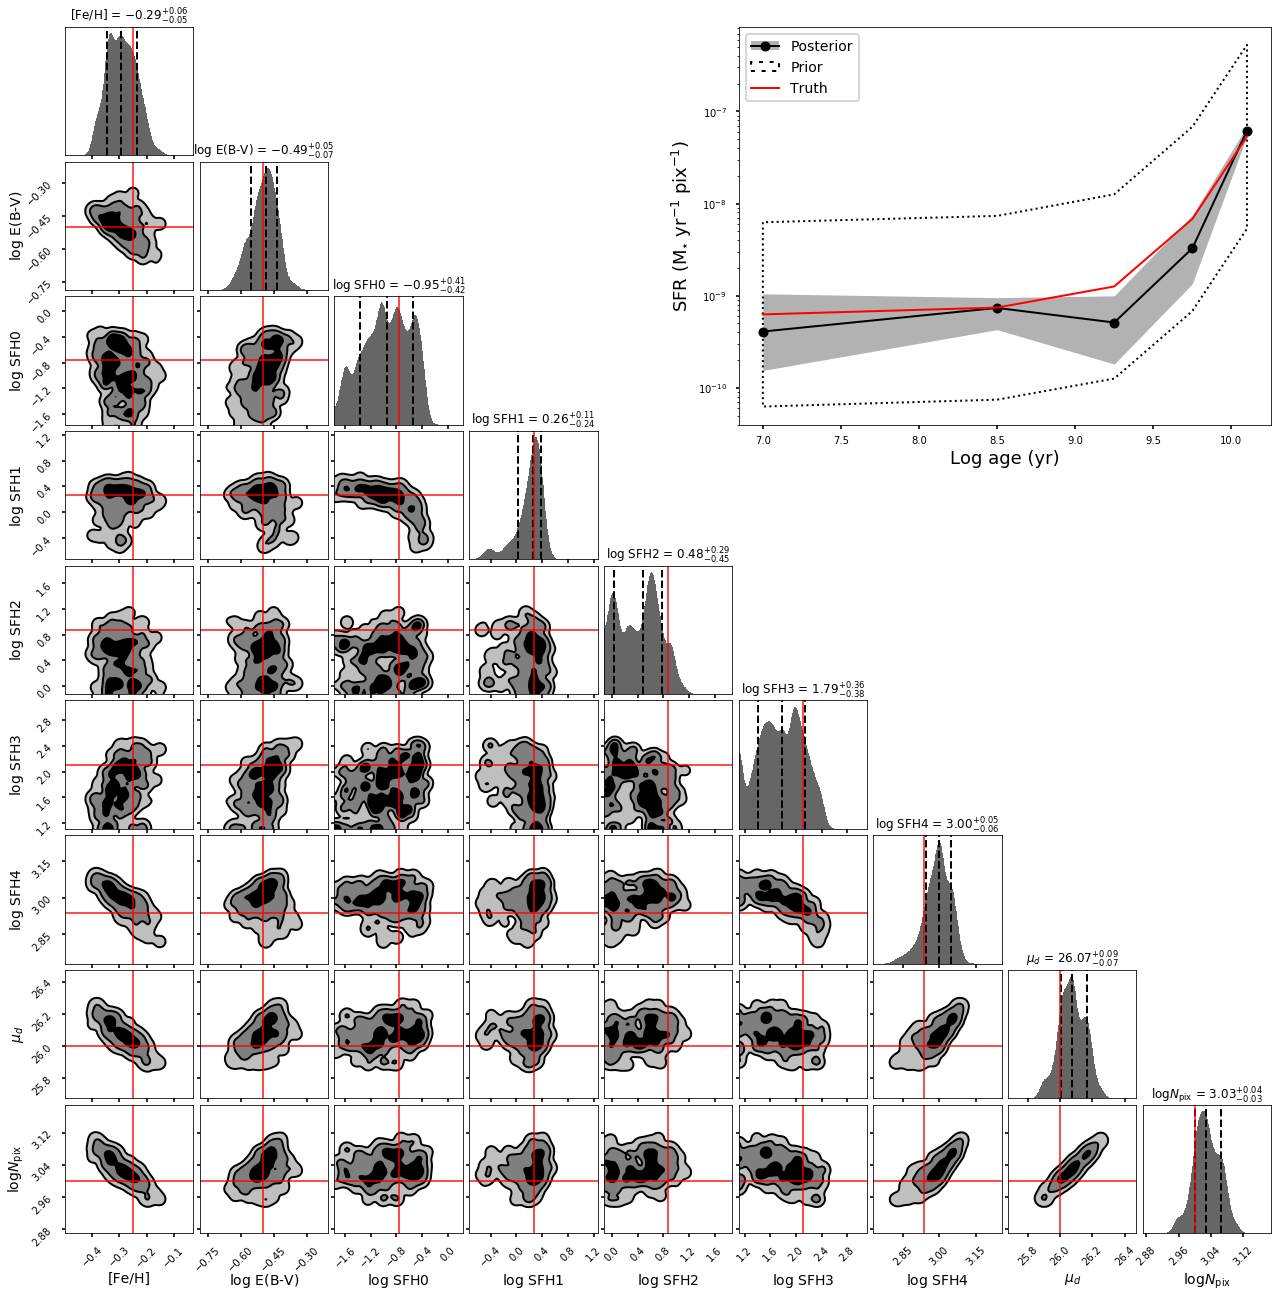

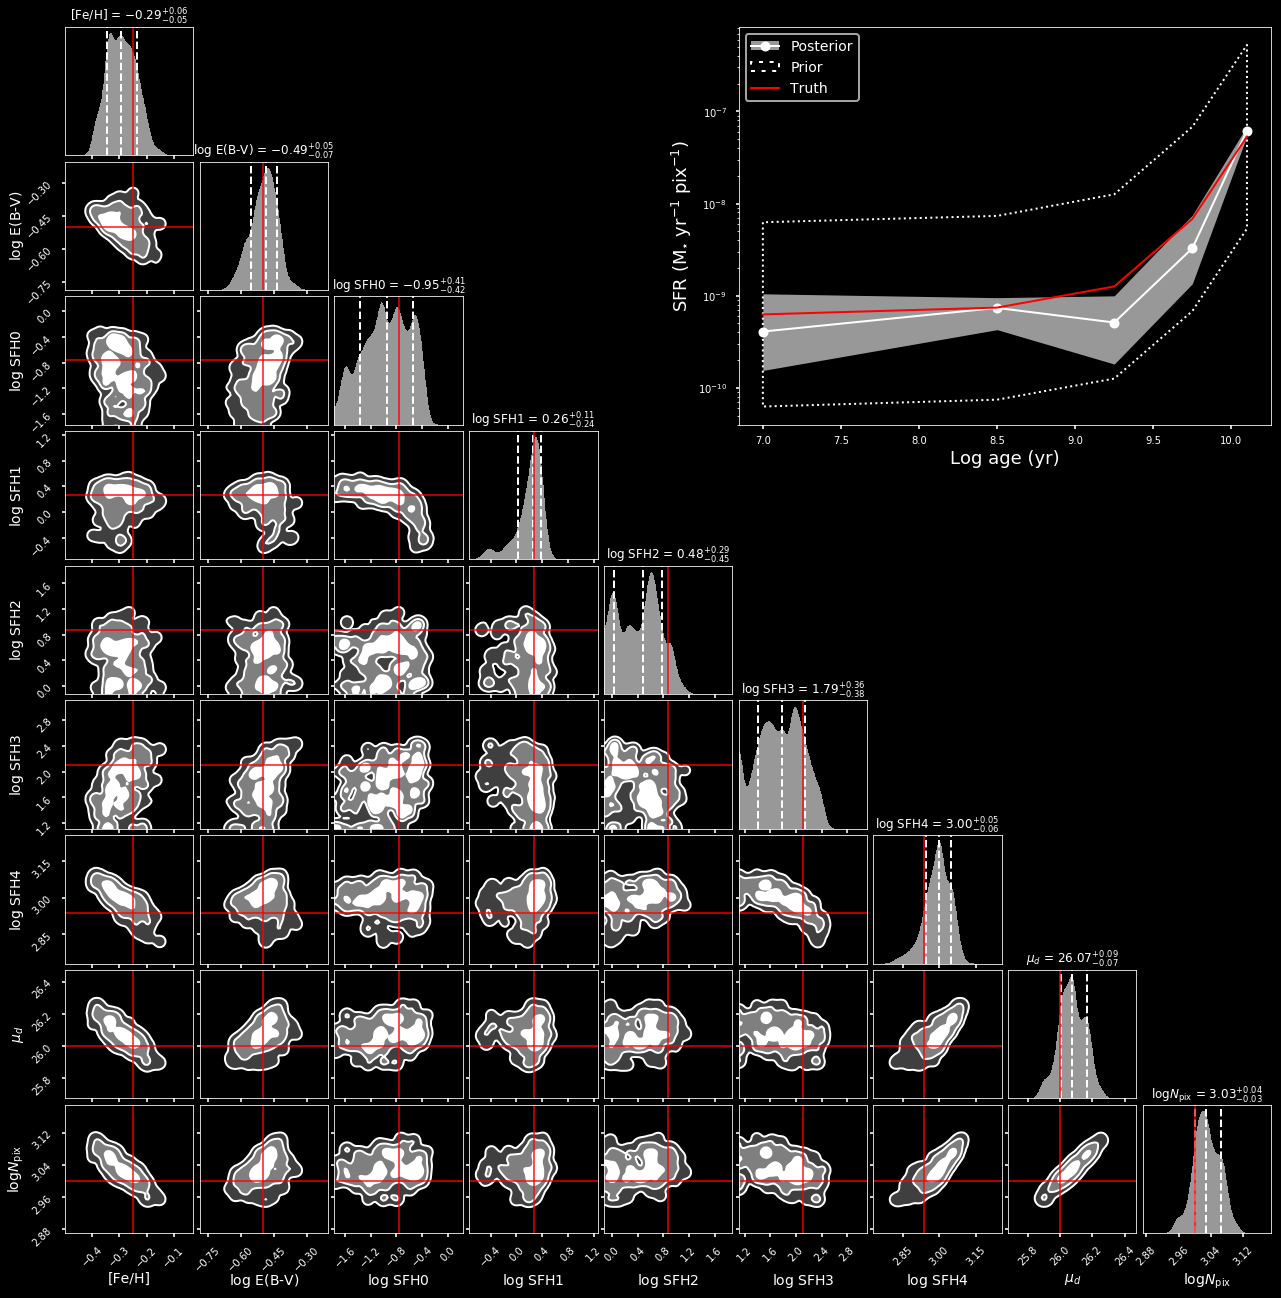

In [21]:
%%savefig_dark_light paper1/NonParam_Corner_tau_3.pdf
r = res['mock_46']
fig, axes = plt.subplots(ncols=9, nrows=9, figsize=(18, 18))
fig, axes = r.plot_corner(fig=(fig,axes));
for ax in axes.flatten():
    ax.title.set_fontsize(12.)
gs = axes[0,0].get_gridspec()
for i in range(9):
    for j in range(9):
        if j > i:
            axes[i,j].remove()
axbig = fig.add_subplot(gs[:3, 5:])
_, lines = r.plot_sfr(ax=axbig, all_ages=False,
                      error_kwargs={'alpha': 0.})
axbig.set_ylabel(axbig.get_ylabel(), fontsize=18)
axbig.set_xlabel(axbig.get_xlabel(), fontsize=18)

In [17]:
res['mock_48']

# New Figure

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support None instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


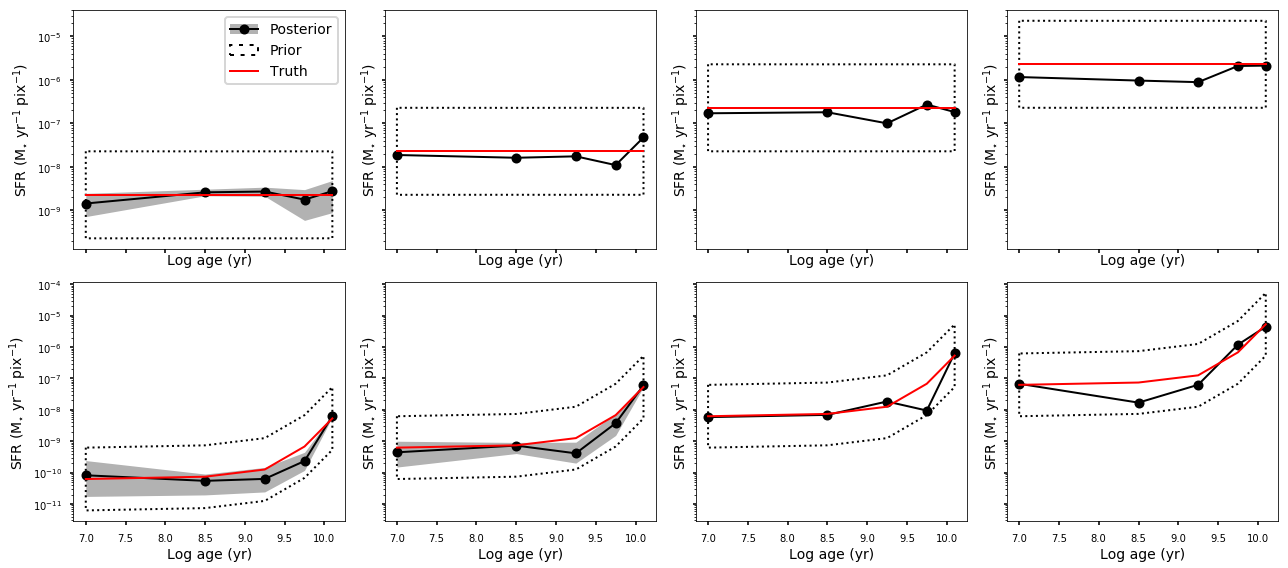

In [49]:
fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(18, 8), sharey='row', sharex=True)
for a, k in zip(axes[0], ['mock_50', 'mock_51', 'mock_52', 'mock_53', 'mock']):
    r = res[k]
    r.plot_sfr(ax=a, all_ages=False, max_logl=max_logls.loc[k].logl_mean, error_kwargs={'alpha': 0.})
for a, k in zip(axes[1], ['mock_8', 'mock_46', 'mock_47', 'mock_48']):
    r = res[k]
    r.plot_sfr(ax=a, all_ages=False, max_logl=max_logls.loc[k].logl_mean, error_kwargs={'alpha': 0.})
for i, a in enumerate(axes.flatten()):
    if i > 0:
        a.get_legend().remove()
plt.tight_layout()

In [51]:
res['mock_52'].df.logl.tail(), res['mock_52'].max_logl

(6476   -565.53
 6477   -546.76
 6478   -533.27
 6479   -511.41
 6480   -492.27
 Name: logl, dtype: float64, -455.663)

# Figure 5

In [80]:
df_summary.loc['mock_27']

t_run            37.5917
t_step           2.71376
delta_logz    0.00174333
finished            True
logl_max        -128.157
Name: mock_27, dtype: object

In [81]:
df_summary.loc['mock_28']

t_run             46.4889
t_step            2.87911
delta_logz    0.000810885
finished             True
logl_max         -101.874
Name: mock_28, dtype: object

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt


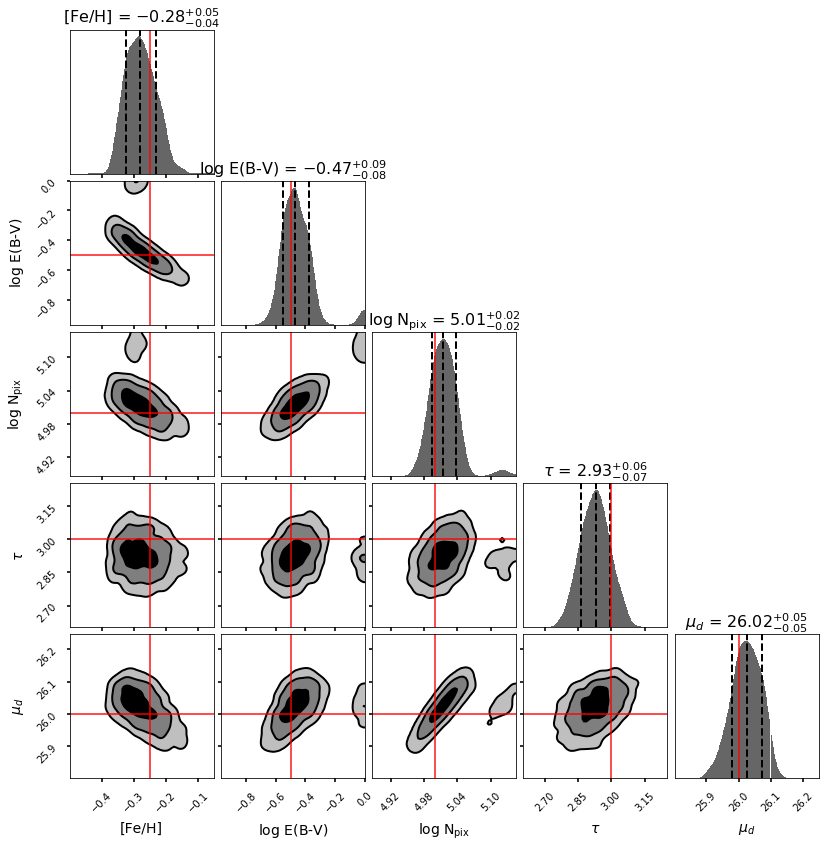

In [83]:
res['mock_27'].plot_corner(max_logl=df_summary.loc['mock_27'].logl_max);

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt


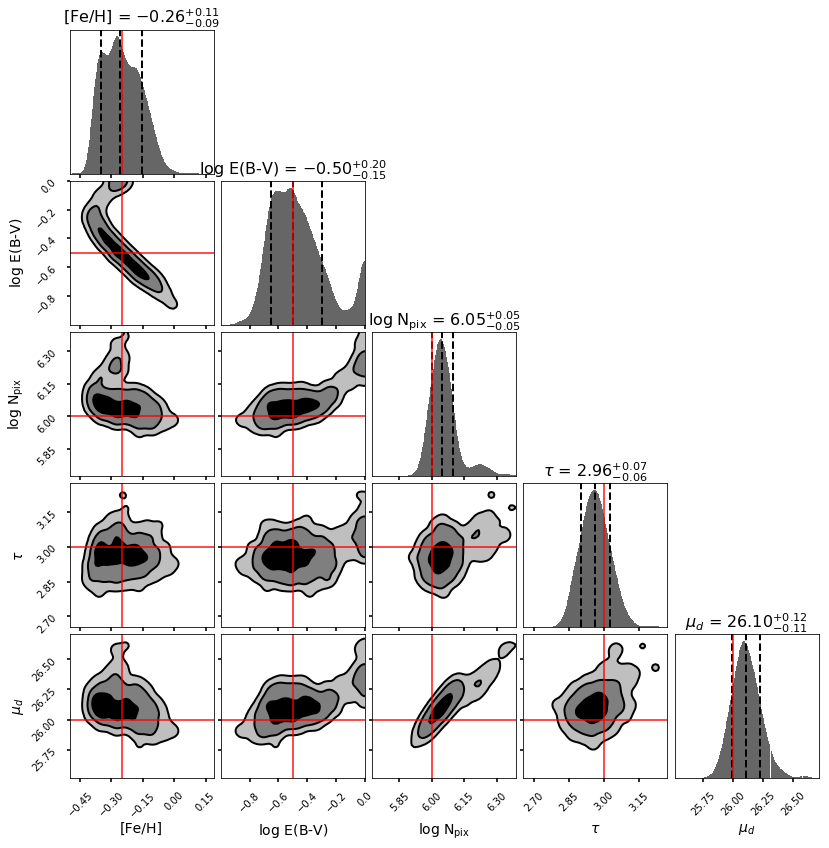

In [84]:
res['mock_28'].plot_corner(max_logl=df_summary.loc['mock_28'].logl_max);

In [25]:
res['mock_5'].stds

array([0.03343022, 0.0364375 , 0.02608541, 0.14888526, 0.07647428])

In [27]:
a, b = res['mock_5'].lower_upper
(b - a) / 2.

array([0.034895, 0.03634 , 0.02665 , 0.1525  , 0.0785  ])

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving light figure as figures/paper1/Nim_mock.pdf
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving dark figure as figures_dark/paper1/Nim_mock_dark.pdf


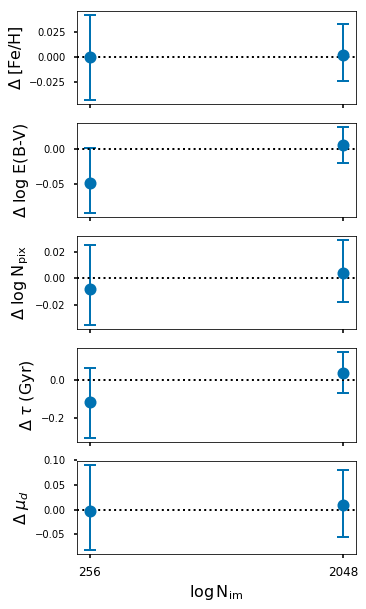

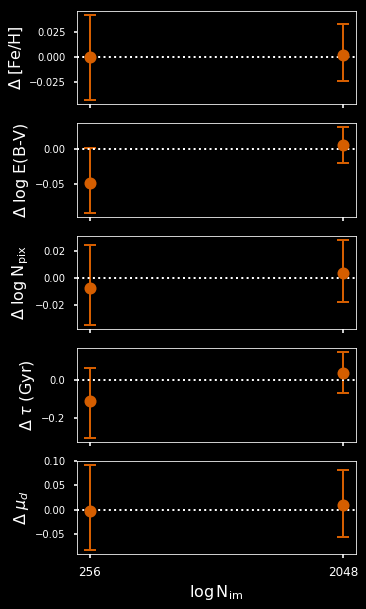

In [94]:
%%savefig_dark_light paper1/Nim_mock.pdf
fig, axes = plt.subplots(nrows=5, figsize=(5,10), sharex=True)
keys = ['mock_5', 'mock_41']
Nims = [256, 2048]
color = (dark_color if is_dark else light_color)
for i, k in enumerate(keys):
    r = res[k]
    r.plot_errorbars(axes, x=i, offsets=r.true_params, color=color)

for i, ax in enumerate(axes):
    ax = axes[i]
    ax.axhline(y=0, ls=':')
    ylabel = r'$\Delta\;$' + res['mock_5'].labels[i]
    if i == 3:
        ylabel += ' (Gyr)'
    ax.set_ylabel(ylabel, fontsize=16)
    
# axes[0].set_ylim([-0.12, 0.12])
# axes[1].set_ylim([-.3, .3])
# axes[2].set_ylim([-.05, .15])
# axes[3].set_ylim([-.4, .2])
# axes[4].set_ylim([-.1, 0.25])
axes[-1].set_xlabel(r'$\log\,\mathrm{N_{im}}$', fontsize=16)
axes[-1].set_xticks([0, 1])
axes[-1].set_xticklabels([256, 2048], fontsize=12)

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving light figure as figures/paper1/Npix_old.pdf
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving dark figure as figures_dark/paper1/Npix_old_dark.pdf


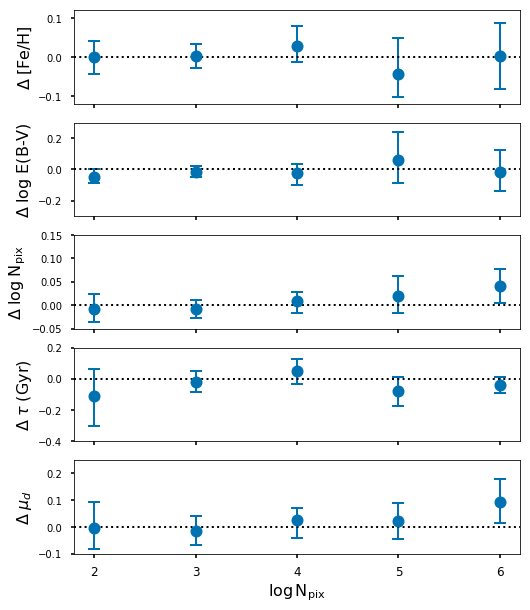

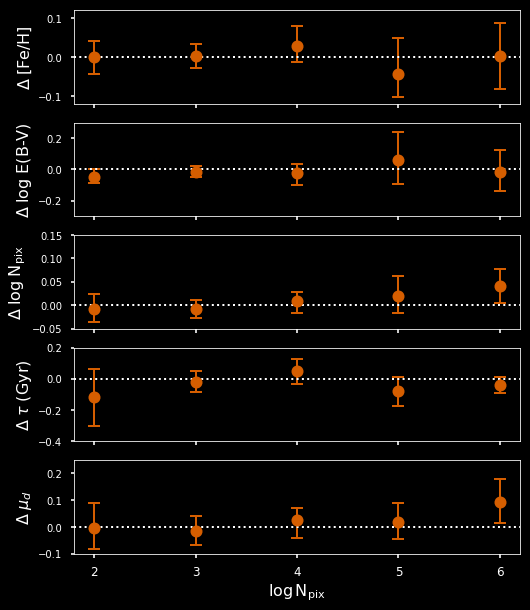

In [18]:
%%savefig_dark_light paper1/Npix_old.pdf
fig, axes = plt.subplots(nrows=5, figsize=(8,10), sharex=True)
keys = ['mock_5', 'mock_25', 'mock_26', 'mock_27', 'mock_28']
Npixs = np.arange(2, 7)
color = (dark_color if is_dark else light_color)
for i, k in enumerate(keys):
    r = res[k]
    r.plot_errorbars(axes, x=Npixs[i], offsets=r.true_params, color=color)

for i, ax in enumerate(axes):
    ax = axes[i]
    ax.axhline(y=0, ls=':')
    ylabel = r'$\Delta\;$' + res['mock_5'].labels[i]
    if i == 3:
        ylabel += ' (Gyr)'
    ax.set_ylabel(ylabel, fontsize=16)
    
axes[0].set_ylim([-0.12, 0.12])
axes[1].set_ylim([-.3, .3])
axes[2].set_ylim([-.05, .15])
axes[3].set_ylim([-.4, .2])
axes[4].set_ylim([-.1, 0.25])
axes[-1].set_xlabel(r'$\log\,\mathrm{N_{pix}}$', fontsize=16)
axes[-1].set_xticks([2, 3, 4, 5, 6])
axes[-1].set_xticklabels([2, 3, 4, 5, 6], fontsize=12)

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving light figure as figures/paper1/Npix_fixedmass.pdf
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving dark figure as figures_dark/paper1/Npix_fixedmass_dark.pdf


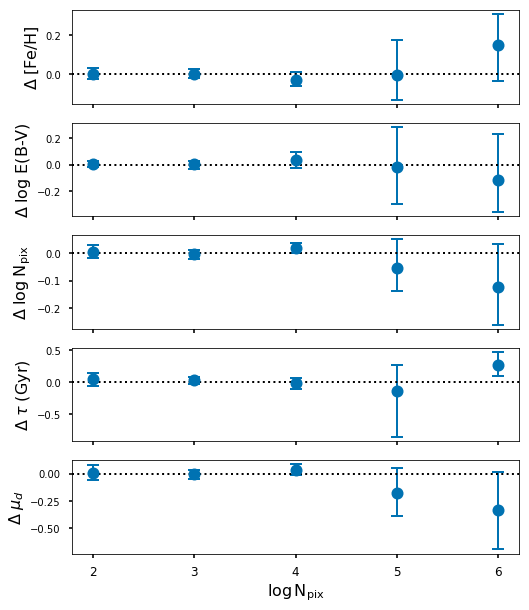

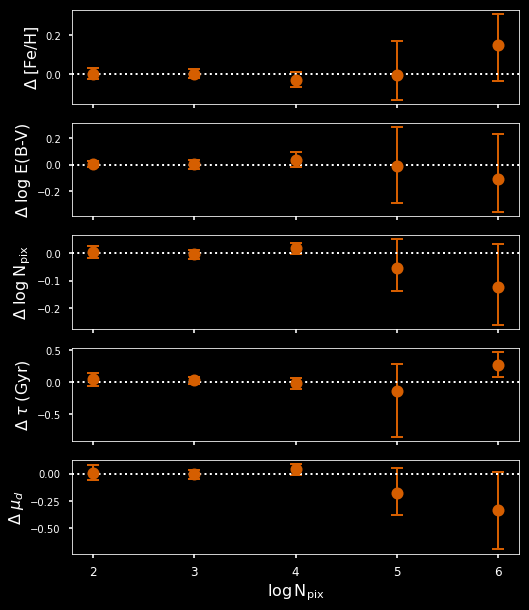

In [19]:
%%savefig_dark_light paper1/Npix_fixedmass.pdf
fig, axes = plt.subplots(nrows=5, figsize=(8,10), sharex=True)
keys = ['mock_41', 'mock_42', 'mock_43', 'mock_44', 'mock_45']
Npixs = np.arange(2, 7)
color = (dark_color if is_dark else light_color)
for i, k in enumerate(keys):
    r = res[k]
    r.plot_errorbars(axes, x=Npixs[i], offsets=r.true_params, color=color)

for i, ax in enumerate(axes):
    ax = axes[i]
    ax.axhline(y=0, ls=':')
    ylabel = r'$\Delta\;$' + res['mock_5'].labels[i]
    if i == 3:
        ylabel += ' (Gyr)'
    ax.set_ylabel(ylabel, fontsize=16)
    
# axes[0].set_ylim([-0.2, .35])
# axes[1].set_ylim([-.3, .3])
# axes[2].set_ylim([-.05, .15])
# axes[3].set_ylim([-.4, .2])
# axes[4].set_ylim([-.1, 0.25])
axes[-1].set_xlabel(r'$\log\,\mathrm{N_{pix}}$', fontsize=16)
axes[-1].set_xticks([2, 3, 4, 5, 6])
axes[-1].set_xticklabels([2, 3, 4, 5, 6], fontsize=12)

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving light figure as figures/paper1/Npix_full.pdf
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving dark figure as figures_dark/paper1/Npix_full_dark.pdf


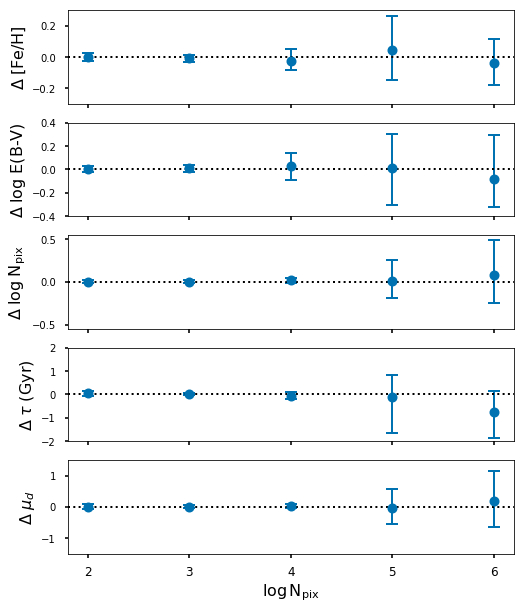

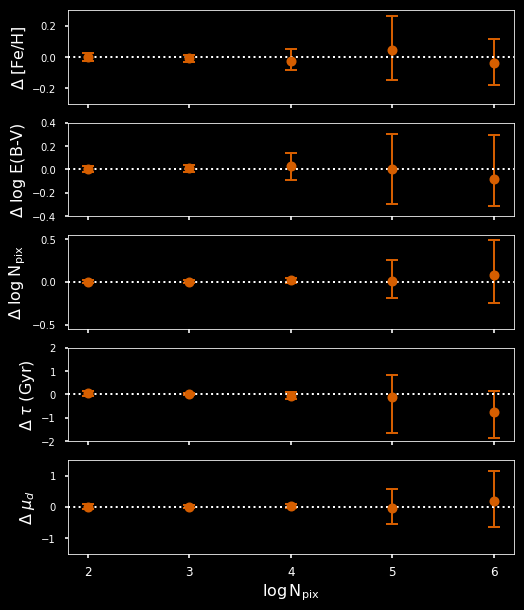

In [46]:
%%savefig_dark_light paper1/Npix_full.pdf
fig, axes = plt.subplots(nrows=5, figsize=(8,10), sharex=True)
keys = ['mock_55', 'mock_56', 'mock_57', 'mock_58', 'mock_59']
Npixs = np.arange(2, 7)
color = (dark_color if is_dark else light_color)
for i, k in enumerate(keys):
    r = res[k]
    r.plot_errorbars(axes, x=Npixs[i], offsets=r.true_params, color=color, ms=8)

for i, ax in enumerate(axes):
    ax = axes[i]
    ax.axhline(y=0, ls=':')
    ylabel = r'$\Delta\;$' + res['mock_5'].labels[i]
    if i == 3:
        ylabel += ' (Gyr)'
    ax.set_ylabel(ylabel, fontsize=16)
    
axes[0].set_ylim([-.3, .3])
axes[1].set_ylim([-.4, .4])
axes[2].set_ylim([-0.55, 0.55])
axes[3].set_ylim([-2, 2])
axes[4].set_ylim([-1.5, 1.5])
axes[-1].set_xlabel(r'$\log\,\mathrm{N_{pix}}$', fontsize=16)
axes[-1].set_xticks([2, 3, 4, 5, 6])
axes[-1].set_xticklabels([2, 3, 4, 5, 6], fontsize=12)

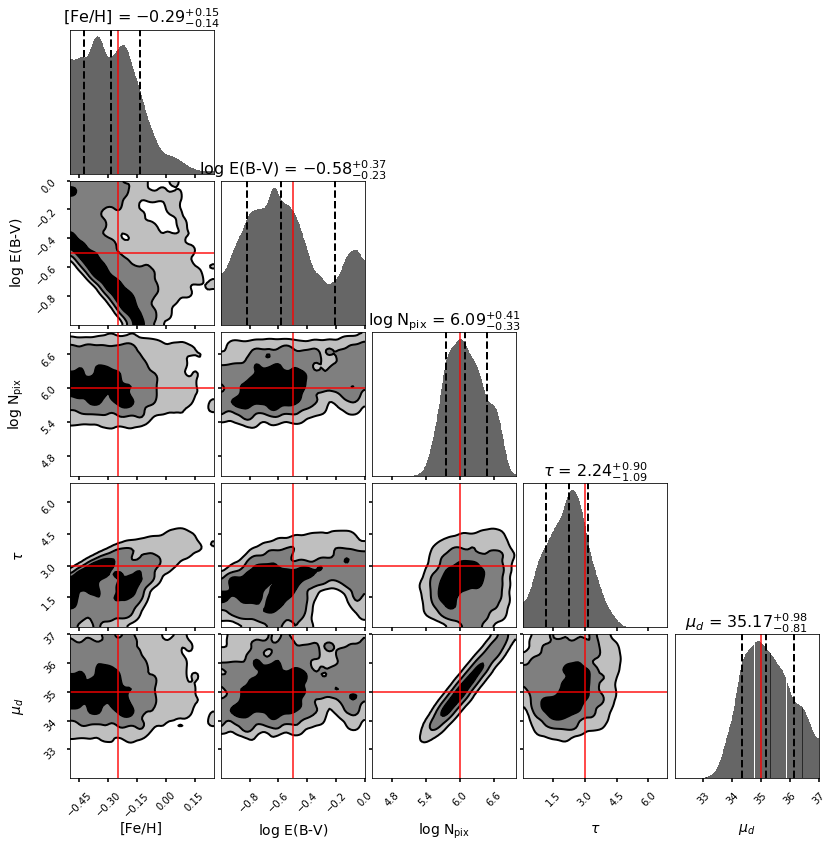

In [48]:
res['mock_59'].plot_corner();

# Figure 6 - Variance

In [19]:
keys = ['mock_5', 'mock_34', 'mock_35', 'mock_36', 'mock_37', 'mock_38', 'mock_39', 'mock_40']
means = np.array([res[k].medians for k in keys])
stds = np.array([res[k].stds for k in keys])

Saving light figure as figures/paper1/Errors.pdf
Saving dark figure as figures_dark/paper1/Errors_dark.pdf


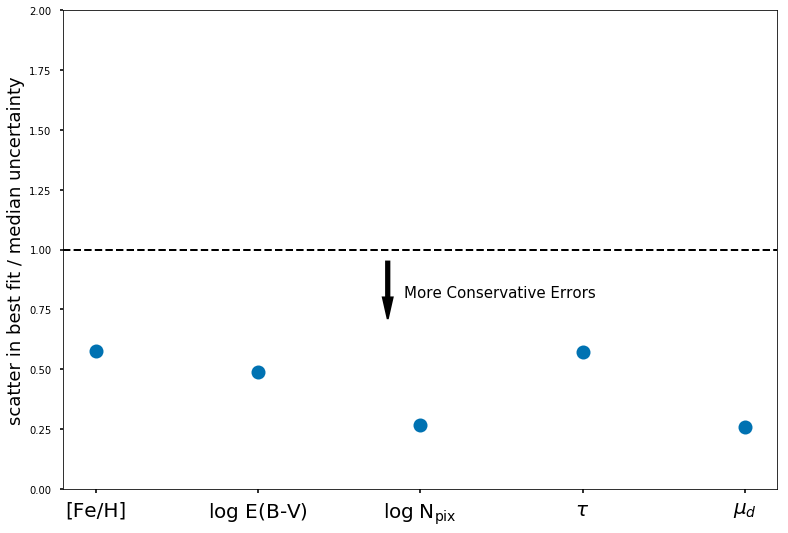

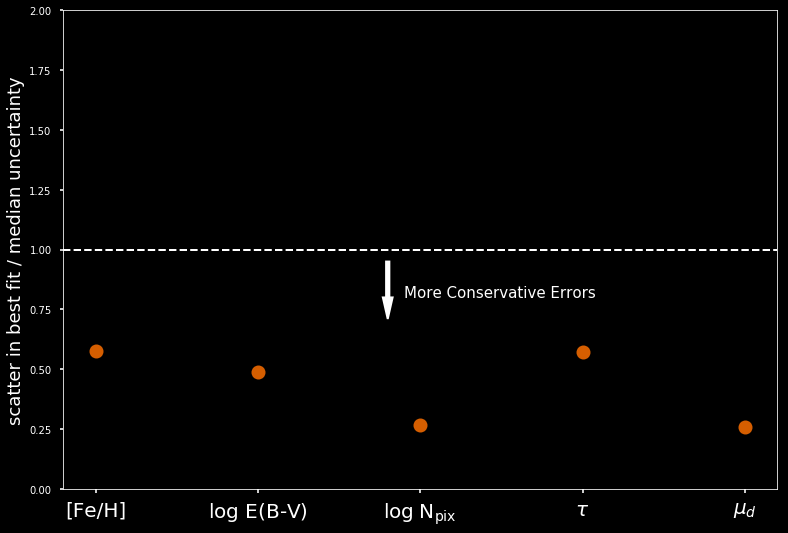

In [20]:
%%savefig_dark_light paper1/Errors.pdf
fig, ax = plt.subplots()
color = (dark_color if is_dark else light_color)
ax.plot(np.std(means, axis=0) / np.median(stds, axis=0), marker='o', ls='', color=color)
ax.arrow(1.8, 0.95, 0, -0.15, width=0.02, color=('w' if is_dark else'k'))
ax.text(1.9, 0.8, 'More Conservative Errors', fontsize=15)
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(res['mock_5'].labels, fontsize=20)
ax.axhline(y=1, ls='--')
ax.set_ylim([0,2])
ax.set_ylabel(r'scatter in best fit / median uncertainty', fontsize=18)

# Figure 7 - Other Violins

In [32]:
keys = [f'mock_{i}' for i in [33, 6, 10, 11, 30, 29]]
df_summary.loc[keys]

t_run     t_step    delta_logz  finished  logl_max
mock_33  143.219444   3.422164  7.854144e-04      True  -933.779
mock_6   166.177778   4.652631  9.770749e-06      True  -956.932
mock_10  160.130556   2.297746  3.383511e-06      True  -917.421
mock_11  144.097222  10.268617  4.818611e+01     False  -853.291
mock_30  133.366667   3.179287  1.307227e-03      True -2877.895
mock_29  137.808333   3.293961  5.469752e-07      True  -443.049

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving light figure as figures/paper1/ModelChoices.pdf
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving dark figure as figures_dark/paper1/ModelChoices_dark.pdf


<Figure size 1440x720 with 0 Axes>

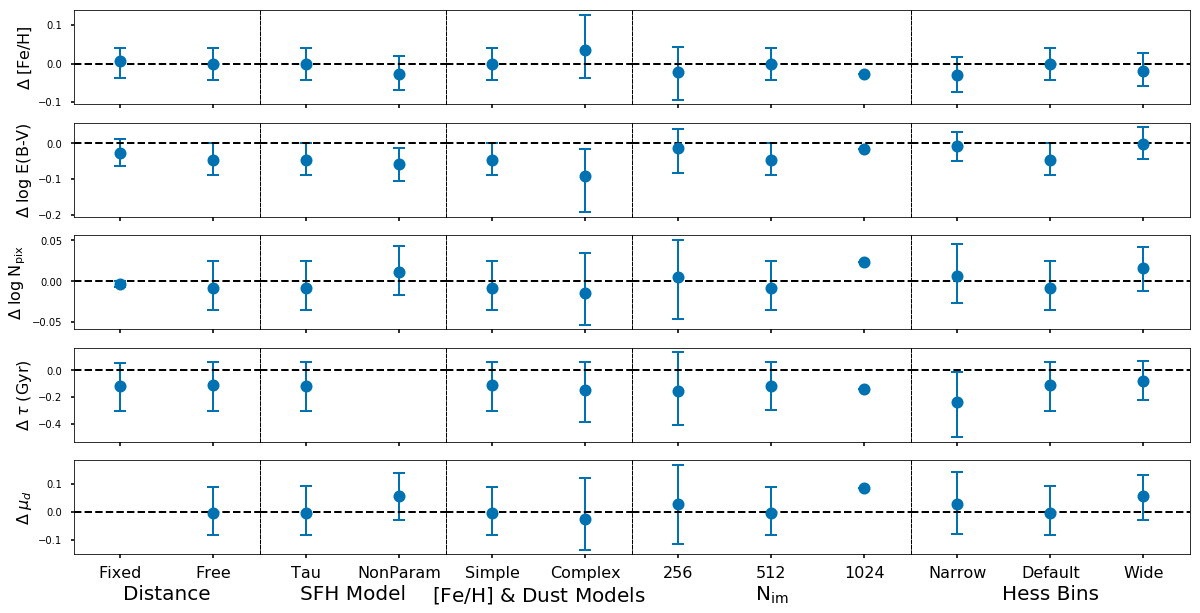

<Figure size 1440x720 with 0 Axes>

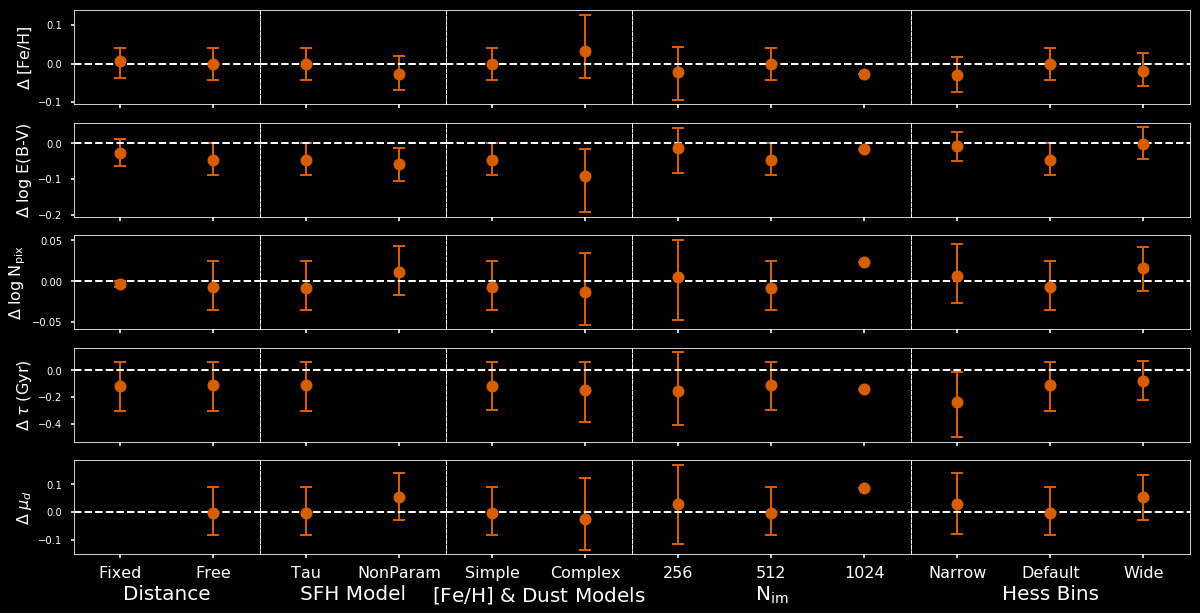

In [67]:
%%savefig_dark_light paper1/ModelChoices.pdf
fig = plt.figure(figsize=(20,10))
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 10), gridspec_kw={'width_ratios': [2,2,2,3,3], 'wspace': 0.}, sharex='col', sharey='row')
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        a = axes[i,j]
        if j > 0:
            a.spines['left'].set_linestyle('--')
            a.spines['left'].set_linewidth(1.)
            a.spines['left'].set_fill(False)
            a.yaxis.set_visible(False)
        if j < axes.shape[1]-1:
#             a.spines['right'].set_linestyle(':')
            a.spines['right'].set_visible(False)

color = (dark_color if is_dark else light_color) 

# Distance
r = res['mock_33']
r.plot_errorbars(axes=axes[:-1, 0], x=0, offsets=r.true_params, color=color)
r = res['mock_5']
r.plot_errorbars(axes=axes[:, 0], x=1, offsets=r.true_params, color=color)

# SFH
r = res['mock_5']
r.plot_errorbars(axes=axes[:, 1], x=0, offsets=r.true_params, color=color)
r = res['mock_8']
np_axes = [axes[0, 1], axes[1, 1]] + [None, None, None, None, None] + [axes[-1, 1], axes[2, 1]]
r.plot_errorbars(axes=np_axes, x=1, offsets=r.true_params, color=color)

# sig
r = res['mock_5']
r.plot_errorbars(axes=axes[:, 2], x=0, offsets=r.true_params, color=color)
r = res['mock_6']
np_axes = [axes[0, 2], None, axes[1, 2], None] + list(axes[2:, 2])
r.plot_errorbars(axes=np_axes, x=1, offsets=r.true_params, color=color)

# Nim
for i, k in enumerate(['mock_10', 'mock_5', 'mock_11']):
    r = res[k]
    r.plot_errorbars(axes=axes[:, 3], x=i, offsets=r.true_params, color=color)

# Hess Bins
for i, k in enumerate(['mock_30', 'mock_5', 'mock_29']):
    r = res[k]
    r.plot_errorbars(axes=axes[:, 4], x=i, offsets=r.true_params, color=color)
            
yl_size = 16
xl_size = 20
xt_size = 16
axes[-1, 0].set_xlabel('Distance', fontsize=xl_size)
axes[-1, 0].set_xticks([0, 1])
axes[-1, 0].set_xticklabels(['Fixed', 'Free'], fontsize=xt_size)
axes[-1, 0].set_xlim([-0.5, 1.5])

axes[-1, 1].set_xlabel('SFH Model', fontsize=xl_size)
axes[-1, 1].set_xticks([0, 1])
axes[-1, 1].set_xticklabels(['Tau', 'NonParam'], fontsize=xt_size)
axes[-1, 1].set_xlim([-0.5, 1.5])

axes[-1, 2].set_xlabel(r'$\mathrm{[Fe/H]}$ & Dust Models', fontsize=xl_size)
axes[-1, 2].set_xticks([0, 1])
axes[-1, 2].set_xticklabels(['Simple', 'Complex'], fontsize=xt_size)
axes[-1, 2].set_xlim([-0.5, 1.5])

axes[-1, 3].set_xlabel(r'$\mathrm{N_{im}}$', fontsize=xl_size)
axes[-1, 3].set_xticks([0, 1, 2])
axes[-1, 3].set_xticklabels([256, 512, 1024], fontsize=xt_size)
axes[-1, 3].set_xlim([-0.5, 2.5])

axes[-1, 4].set_xlabel('Hess Bins', fontsize=xl_size)
axes[-1, 4].set_xticks([0, 1, 2])
axes[-1, 4].set_xticklabels(['Narrow', 'Default', 'Wide'], fontsize=xt_size)
axes[-1, 4].set_xlim([-0.5, 2.5])

for ax in axes.flatten():
    ax.axhline(y=0, ls='--')
for i in range(5):
    ylabel = r'$\Delta\;$' + res['mock_5'].labels[i]
    if i == 3:
        ylabel += ' (Gyr)'
    axes[i, 0].set_ylabel(ylabel, fontsize=yl_size)

In [70]:
res['mock_10'].df.time_elapsed.values.max()

160.13055555555556

In [75]:
res['mock_5'].df.time_elapsed.values[-501]

166.95555555555555

In [81]:
res['mock_5'].df.eff.tail()

11724    7.587
11725    7.587
11726    7.587
11727    7.587
11728    7.587
Name: eff, dtype: float64

In [82]:
res['mock_10'].df.eff.tail()

10809    4.3087
10810    4.3091
10811    4.3095
10812    4.3099
10813    4.3103
Name: eff, dtype: float64

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving light figure as figures/paper1/Model_Mismatch_arrow.pdf
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving dark figure as figures_dark/paper1/Model_Mismatch_arrow_dark.pdf


<Figure size 864x720 with 0 Axes>

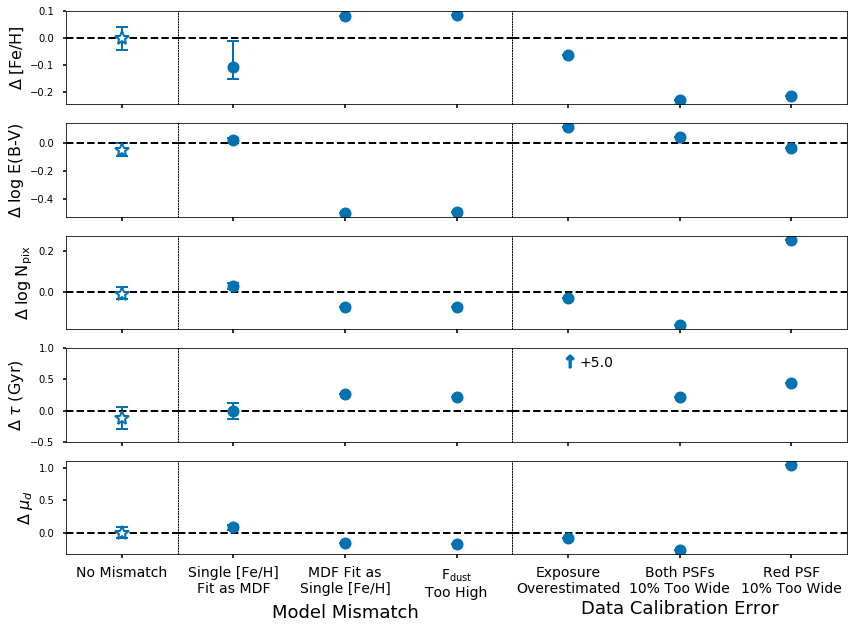

<Figure size 864x720 with 0 Axes>

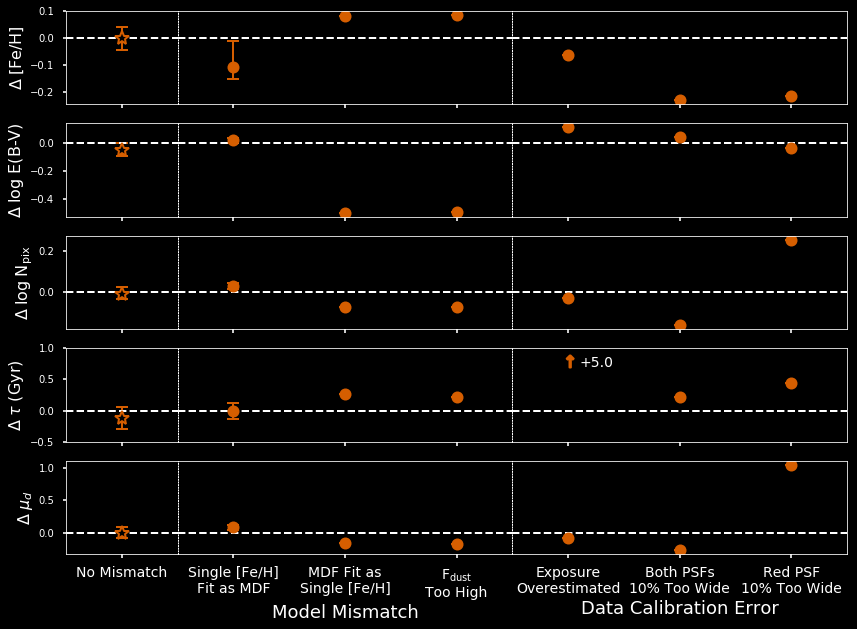

In [24]:
%%savefig_dark_light paper1/Model_Mismatch_arrow.pdf
fig = plt.figure(figsize=(12, 10))
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(14, 10), gridspec_kw={'width_ratios': [1,3,3], 'wspace': 0.}, sharex='col', sharey='row')
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        a = axes[i,j]
        if j > 0:
            a.spines['left'].set_linestyle(':')
            a.spines['left'].set_linewidth(1.)
            a.spines['left'].set_fill(False)
            a.yaxis.set_visible(False)
        if j < axes.shape[1]-1:
#             a.spines['right'].set_linestyle(':')
            a.spines['right'].set_visible(False)
plt.subplots_adjust(wspace=0.)

color = (dark_color if is_dark else light_color) 
face = ('k' if is_dark else 'w')

for i, k in enumerate(['mock_5']):
    r = res[k]
    r.plot_errorbars(axes=axes[:, 0], x=i, offsets=res['mock_5'].true_params, color=color, marker='*', mfc=face, ms=15)

# Model Complexity
for i, k in enumerate(['mismatch_1', 'mismatch_2', 'mismatch_5']):
    r = res[k]
    r.plot_errorbars(axes=axes[:, 1], x=i, offsets=res['mock_5'].true_params, color=color)

# Data Calibration
for i, k in enumerate(['mismatch_7', 'mismatch_8', 'mismatch_9']):
    r = res[k]
    r.plot_errorbars(axes=axes[:, 2], x=i, offsets=res['mock_5'].true_params, color=color)

for i in range(5):
    ax = axes[i, 0]
    ylabel = r'$\Delta\;$' + res['mock_5'].labels[i]
    if i == 3:
        ylabel += ' (Gyr)'
    ax.set_ylabel(ylabel, fontsize=16)

for ax in axes.flatten():
    ax.axhline(y=0, ls='--')

xts = 14
ax = axes[-1, 0]
ax.set_xticks([0])
ax.set_xlabel('')
ax.set_xticklabels(['No Mismatch'], fontsize=xts)
ax.set_xlim([-0.5, 0.5])

ax = axes[-1, 1]
ax.set_xticks([0, 1, 2])
ax.set_xlabel('Model Mismatch', fontsize=18)
ax.set_xticklabels(['Single [Fe/H]\nFit as MDF',
                    'MDF Fit as\nSingle [Fe/H]',
                    r'$\mathrm{F_{dust}}$' + '\nToo High'], fontsize=xts)
ax.set_xlim([-0.5, 2.5])

ax = axes[-1, 2]
ax.set_xticks([0, 1, 2])
ax.set_xlabel('Data Calibration Error', fontsize=18)
ax.set_xticklabels(['Exposure\nOverestimated',
                    'Both PSFs\n10% Too Wide',
                    'Red PSF\n10% Too Wide'], fontsize=xts)
ax.set_xlim([-0.5, 2.5])

dy = res['mismatch_7'].medians[3] - res['mismatch_7'].true_params[3]
axes[3, 0].set_ylim([-.5, 1])
axes[3, 2].plot(0, 0.8, marker=r'$\uparrow$', color=color)
axes[3, 2].text(0.1, 0.7, f'{dy:+.1f}', fontsize=14)

# Figure 7

In [102]:
r = res['mock_5']

In [103]:
r.df.logl.max()

-868.35

In [104]:
max_logls.loc['mock_5']

logl_mean   -984.609
logl_true   -995.698
Name: mock_5, dtype: float64

In [105]:
logls = np.linspace(r.df.logl.max(), -1050., 100)
means = np.array([r.means(max_logl=l) for l in tqdm(logls)])
stds = np.array([r.stds(max_logl=l) for l in tqdm(logls)])

100%|██████████| 100/100 [00:09<00:00, 10.84it/s]


Saving light figure as figures/paper1/Likelihood_Ceiling.pdf
Saving dark figure as figures_dark/paper1/Likelihood_Ceiling_dark.pdf


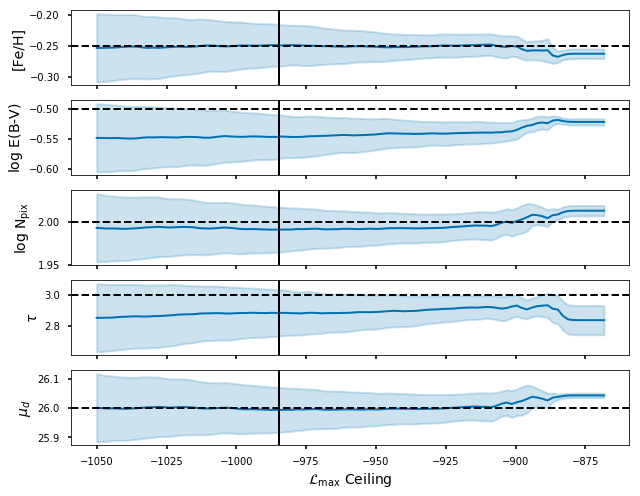

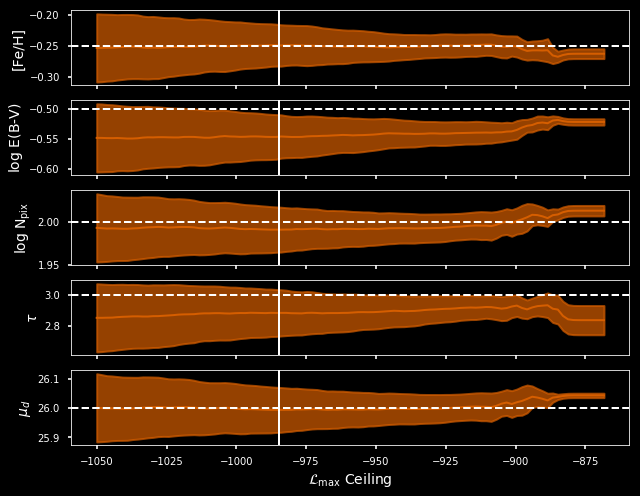

In [107]:
%%savefig_dark_light paper1/Likelihood_Ceiling.pdf
fig, axes = plt.subplots(nrows=5, figsize=(10, 8), sharex=True)
for i in range(5):
    axes[i].plot(logls, means[:, i], color=(dark_color if is_dark else light_color))
    axes[i].fill_between(logls, y1=means[:,i]+stds[:,i], y2=means[:,i]-stds[:,i], alpha=(0.7 if is_dark else 0.2), zorder=-1, color=(dark_color if is_dark else light_color))
    axes[i].axvline(x=max_logls.loc['mock_5'].logl_mean, ls='-')
    axes[i].axhline(y=r.true_params[i], ls='--')
    axes[i].set_ylabel(r.labels[i])
axes[-1].set_xlabel(r'$\mathcal{L}_\mathrm{max}$ Ceiling')
# plt.savefig('figures/paper1/Likelihood_Cutoffs.pdf')

In [38]:
colors = color_palette('colorblind', 10).as_hex()

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt


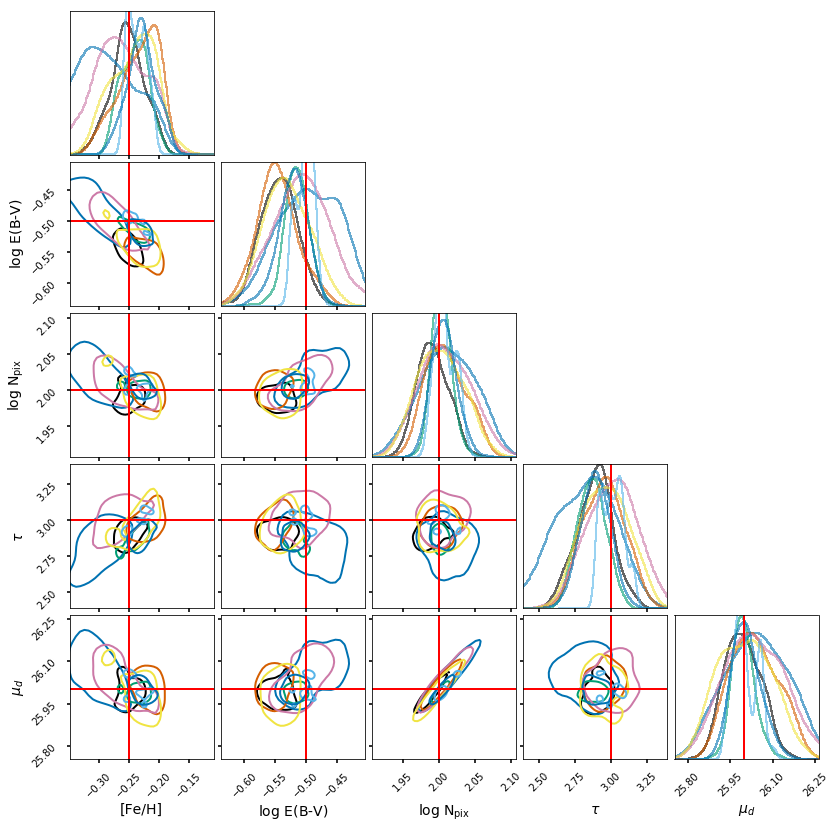

In [39]:
r = res['mock_5']
fig = r.plot_corner(max_logl=max_logls.loc['mock_5'].logl_mean, filled=False, sig_levels=[1], show_titles=False, quantiles=[], smooth=0.03)
for i, d in enumerate(range(34, 41)):
    k = 'mock_{:d}'.format(d)
    r = res[k]
    c = colors[i]
    r.plot_corner(max_logl=max_logls.loc[k].logl_mean, filled=False, sig_levels=[1], color=c, show_titles=False, fig=fig, quantiles=[], smooth=0.03)

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt


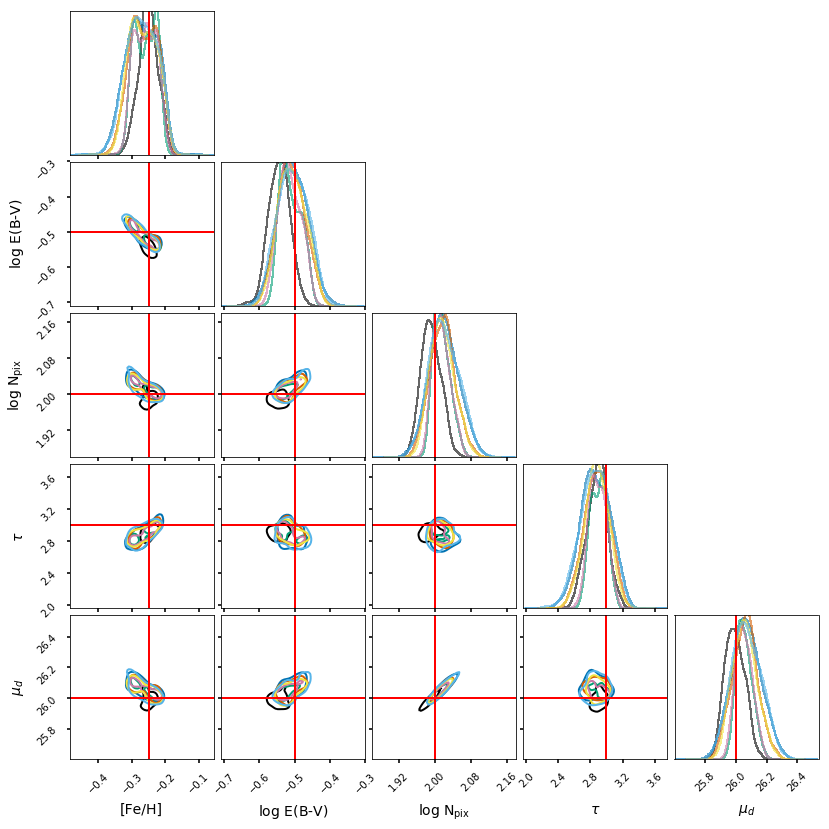

In [45]:
r = res['mock_5']
fig = r.plot_corner(max_logl=max_logls.loc['mock_5'].logl_mean, filled=False, sig_levels=[1], show_titles=False, quantiles=[], smooth=0.03)
for i, d in enumerate(range(18, 24)):
    k = 'mock_{:d}'.format(d)
    r = res[k]
    c = colors[i]
    r.plot_corner(max_logl=max_logls.loc[k].logl_mean, filled=False, sig_levels=[1], color=c, show_titles=False, fig=fig, quantiles=[], smooth=0.03)